<a href="https://colab.research.google.com/github/CamiloDlRM/parcial_final_IA/blob/main/parcial_final_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

df['quality_category'] = pd.cut(df['quality'],
                                 bins=[0, 5, 6, 10],
                                 labels=['Malo', 'Bueno', 'Excelente'])

print("=" * 60)
print("DATASET CARGADO EXITOSAMENTE")
print("=" * 60)
print(f"\nDimensiones: {df.shape}")
print(f"\nPrimeras filas:")
print(df.head())
print(f"\nInformación del dataset:")
print(df.info())

DATASET CARGADO EXITOSAMENTE

Dimensiones: (1599, 13)

Primeras filas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  qua

PUNTO 1: DESCRIPCIÓN DEL DATASET

Dataset: Wine Quality Dataset (Red Wine)
Fuente: UCI Machine Learning Repository
Dominio: Enología y calidad de vinos
Tamaño: 1599 observaciones, 12 variables
Problema: Clasificar la calidad del vino en categorías (Malo, Bueno, Excelente)

Variables predictoras:
- fixed acidity: acidez fija
- volatile acidity: acidez volátil
- citric acid: ácido cítrico
- residual sugar: azúcar residual
- chlorides: cloruros
- free sulfur dioxide: dióxido de azufre libre
- total sulfur dioxide: dióxido de azufre total
- density: densidad
- pH: nivel de pH
- sulphates: sulfatos
- alcohol: contenido alcohólico

Variable objetivo: quality_category (Malo/Bueno/Excelente)


PUNTO 2: HIPÓTESIS DE PREDICCIÓN

HIPÓTESIS:
La calidad del vino puede ser predicha principalmente por:
1. Contenido de alcohol (mayor alcohol = mejor calidad)
2. Acidez volátil (menor acidez volátil = mejor calidad)
3. Sulfatos (mayor contenido de sulfatos = mejor calidad)
4. pH y acidez cítrica (balanc

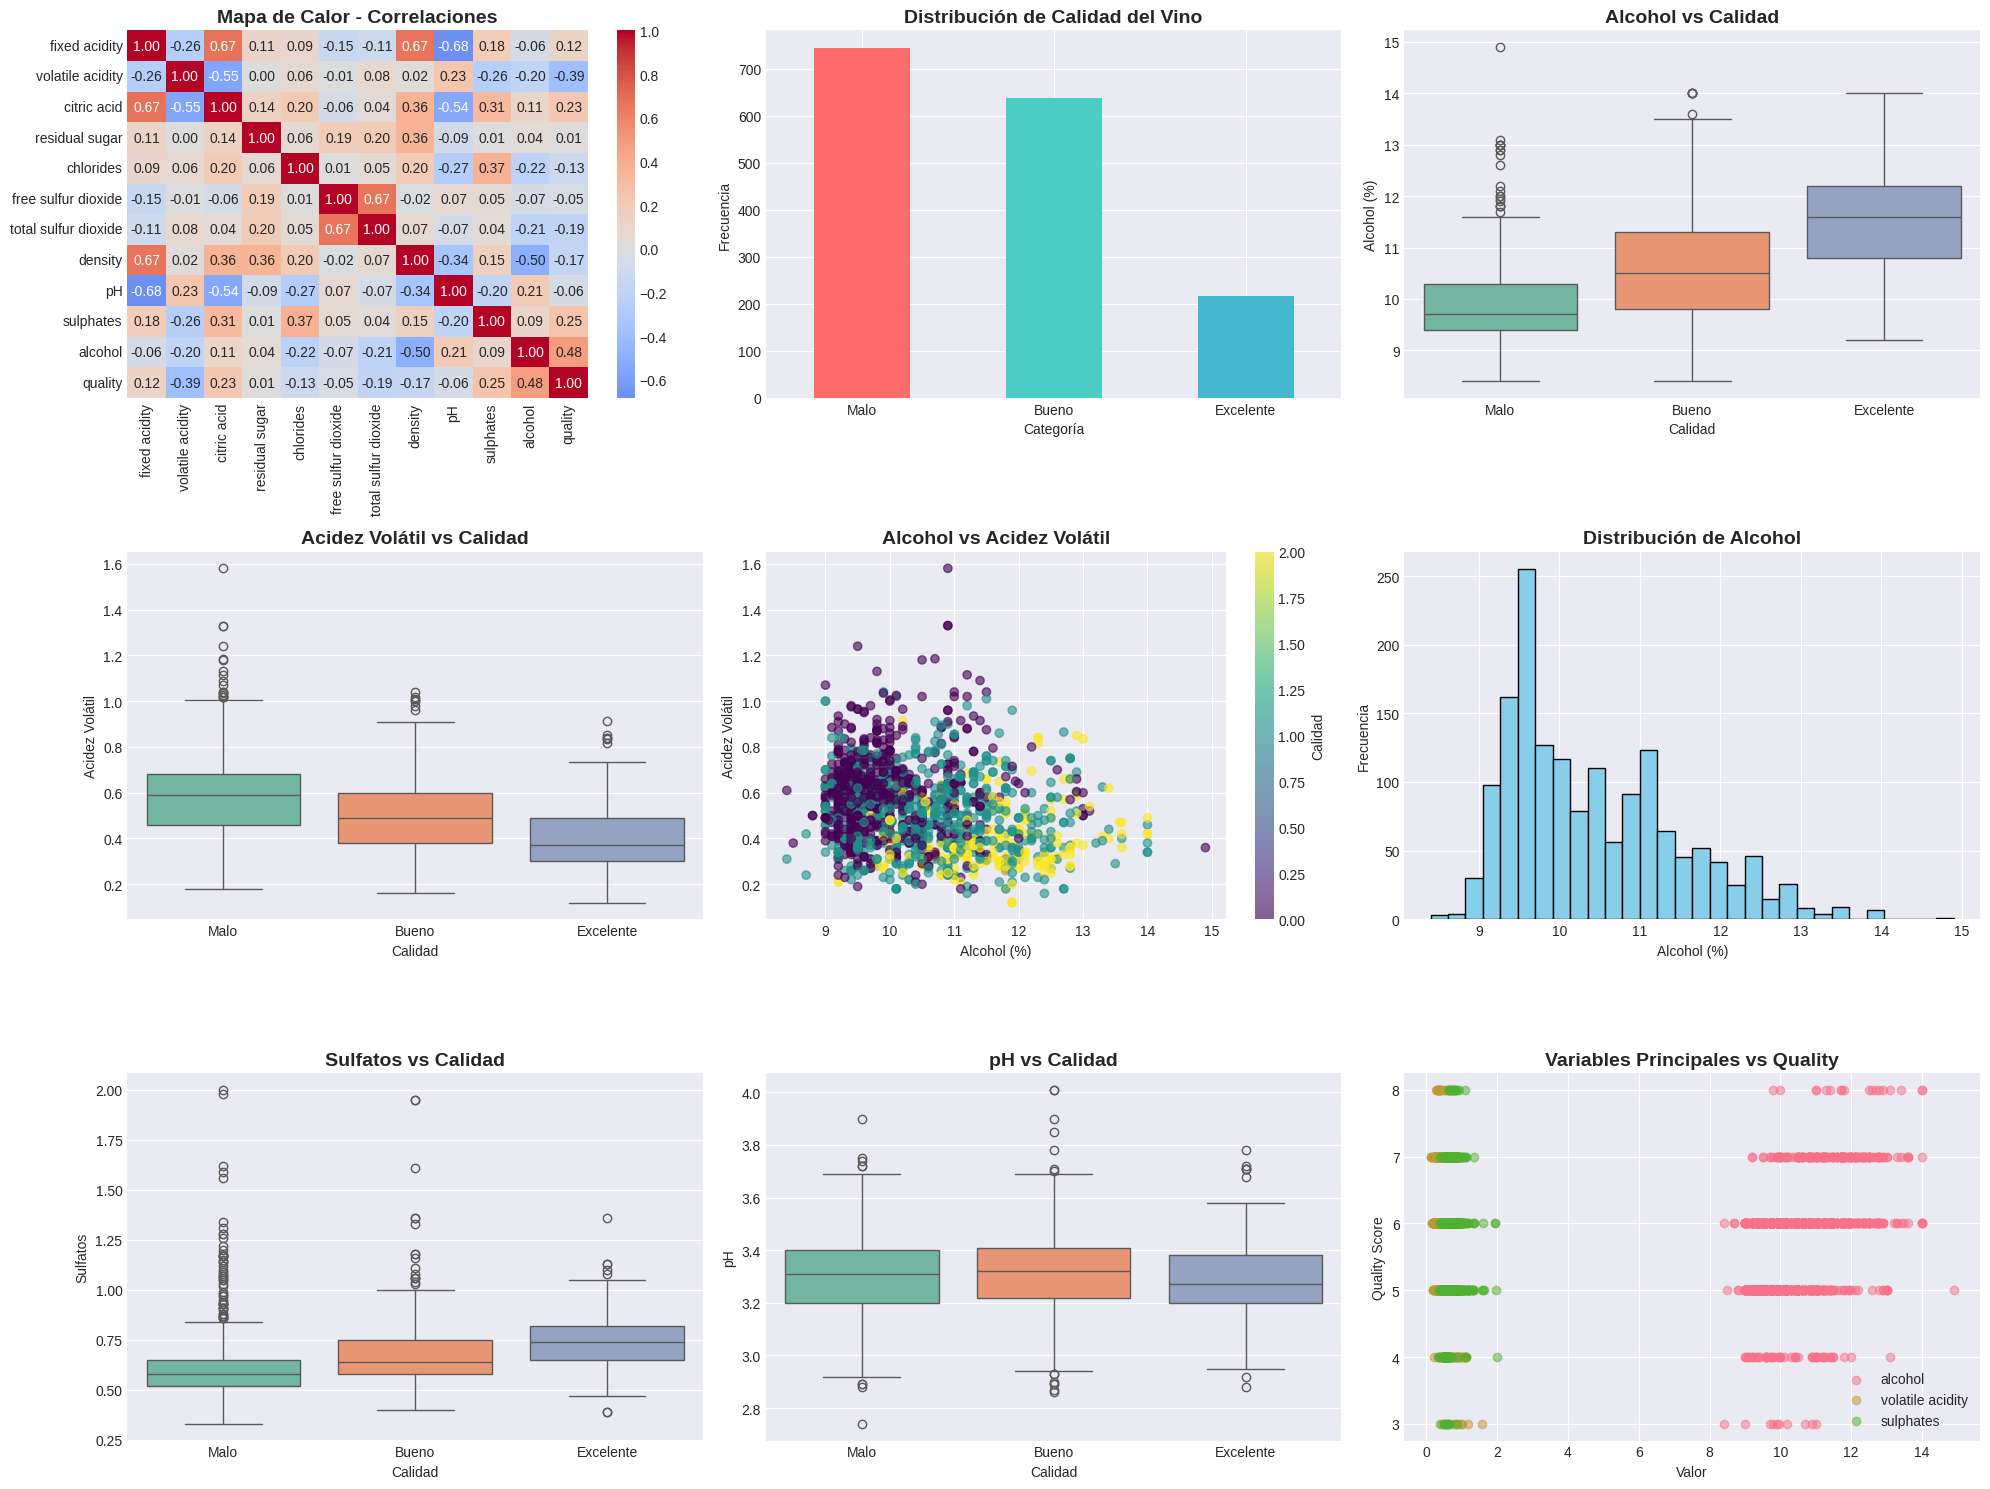

✓ Visualizaciones guardadas en 'visualizaciones_multivariadas.png'


In [ ]:
# ============================================
# PARTE 2: COMPRENSIÓN DE LOS DATOS (Puntos 1-5)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PUNTO 1: Descripción del dataset
print("=" * 60)
print("PUNTO 1: DESCRIPCIÓN DEL DATASET")
print("=" * 60)
descripcion = """
Dataset: Wine Quality Dataset (Red Wine)
Fuente: UCI Machine Learning Repository
Dominio: Enología y calidad de vinos
Tamaño: 1599 observaciones, 12 variables
Problema: Clasificar la calidad del vino en categorías (Malo, Bueno, Excelente)

Variables predictoras:
- fixed acidity: acidez fija
- volatile acidity: acidez volátil
- citric acid: ácido cítrico
- residual sugar: azúcar residual
- chlorides: cloruros
- free sulfur dioxide: dióxido de azufre libre
- total sulfur dioxide: dióxido de azufre total
- density: densidad
- pH: nivel de pH
- sulphates: sulfatos
- alcohol: contenido alcohólico

Variable objetivo: quality_category (Malo/Bueno/Excelente)
"""
print(descripcion)

# PUNTO 2: Hipótesis de predicción
print("\n" + "=" * 60)
print("PUNTO 2: HIPÓTESIS DE PREDICCIÓN")
print("=" * 60)
hipotesis = """
HIPÓTESIS:
La calidad del vino puede ser predicha principalmente por:
1. Contenido de alcohol (mayor alcohol = mejor calidad)
2. Acidez volátil (menor acidez volátil = mejor calidad)
3. Sulfatos (mayor contenido de sulfatos = mejor calidad)
4. pH y acidez cítrica (balance adecuado = mejor calidad)

Esperamos que un modelo de clasificación pueda distinguir entre
vinos de diferente calidad basándose en sus propiedades químicas.
"""
print(hipotesis)

# PUNTO 3: EDA - Exploración inicial
print("\n" + "=" * 60)
print("PUNTO 3: EXPLORACIÓN INICIAL (EDA)")
print("=" * 60)

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo:")
print(df['quality_category'].value_counts())
print("\nProporción:")
print(df['quality_category'].value_counts(normalize=True))

# Detección de outliers usando IQR
print("\nDetección de outliers:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('quality')
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers ({outliers/len(df)*100:.2f}%)")

# PUNTO 4: Análisis de correlación
print("\n" + "=" * 60)
print("PUNTO 4: ANÁLISIS DE CORRELACIÓN")
print("=" * 60)

# Codificar la variable objetivo para correlación
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
quality_encoded = le.fit_transform(df['quality_category'])

# Crear dataframe solo con variables numéricas
df_numeric = df.select_dtypes(include=[np.number]).copy()
df_numeric['quality_category_encoded'] = quality_encoded

# Matriz de correlación con la variable objetivo
correlations = df_numeric.corr()['quality_category_encoded'].drop('quality_category_encoded').sort_values(ascending=False)
print("\nCorrelación con la variable objetivo:")
print(correlations)

print("\nVariables más influyentes (|correlación| > 0.1):")
influential = correlations[abs(correlations) > 0.1]
print(influential)

# PUNTO 5: Visualizaciones multivariadas
print("\n" + "=" * 60)
print("PUNTO 5: VISUALIZACIONES MULTIVARIADAS")
print("=" * 60)
print("Generando gráficos...")

# Crear figura con múltiples subplots
fig = plt.figure(figsize=(20, 15))

# 1. Mapa de calor de correlaciones
plt.subplot(3, 3, 1)
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Mapa de Calor - Correlaciones', fontsize=14, fontweight='bold')

# 2. Distribución de la variable objetivo
plt.subplot(3, 3, 2)
df['quality_category'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Distribución de Calidad del Vino', fontsize=14, fontweight='bold')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# 3. Boxplot - Alcohol vs Calidad
plt.subplot(3, 3, 3)
sns.boxplot(data=df, x='quality_category', y='alcohol', palette='Set2')
plt.title('Alcohol vs Calidad', fontsize=14, fontweight='bold')
plt.xlabel('Calidad')
plt.ylabel('Alcohol (%)')

# 4. Boxplot - Acidez volátil vs Calidad
plt.subplot(3, 3, 4)
sns.boxplot(data=df, x='quality_category', y='volatile acidity', palette='Set2')
plt.title('Acidez Volátil vs Calidad', fontsize=14, fontweight='bold')
plt.xlabel('Calidad')
plt.ylabel('Acidez Volátil')

# 5. Scatter plot - Alcohol vs Acidez volátil
plt.subplot(3, 3, 5)
scatter = plt.scatter(df['alcohol'], df['volatile acidity'],
                     c=pd.factorize(df['quality_category'])[0],
                     cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Calidad')
plt.xlabel('Alcohol (%)')
plt.ylabel('Acidez Volátil')
plt.title('Alcohol vs Acidez Volátil', fontsize=14, fontweight='bold')

# 6. Distribución de alcohol
plt.subplot(3, 3, 6)
df['alcohol'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Alcohol', fontsize=14, fontweight='bold')

# 7. Boxplot - Sulfatos vs Calidad
plt.subplot(3, 3, 7)
sns.boxplot(data=df, x='quality_category', y='sulphates', palette='Set2')
plt.title('Sulfatos vs Calidad', fontsize=14, fontweight='bold')
plt.xlabel('Calidad')
plt.ylabel('Sulfatos')

# 8. Boxplot - pH vs Calidad
plt.subplot(3, 3, 8)
sns.boxplot(data=df, x='quality_category', y='pH', palette='Set2')
plt.title('pH vs Calidad', fontsize=14, fontweight='bold')
plt.xlabel('Calidad')
plt.ylabel('pH')

# 9. Pairplot de variables principales (muestra)
plt.subplot(3, 3, 9)
top_vars = ['alcohol', 'volatile acidity', 'sulphates']
for i, var in enumerate(top_vars):
    plt.scatter(df[var], df['quality'], alpha=0.5, label=var)
plt.xlabel('Valor')
plt.ylabel('Quality Score')
plt.title('Variables Principales vs Quality', fontsize=14, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.savefig('visualizaciones_multivariadas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizaciones guardadas en 'visualizaciones_multivariadas.png'")

PUNTO 6: PREPROCESAMIENTO DE DATOS

Datos faltantes antes del tratamiento:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_category        0
dtype: int64

Clases codificadas: ['Bueno' 'Excelente' 'Malo']
Mapeo: {'Bueno': 0, 'Excelente': 1, 'Malo': 2}

Forma de X: (1599, 11)
Forma de y: (1599,)

Estadísticas después de estandarización:
Media: [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  3.73268229e-16 -6.22113715e-17  4.44366939e-17 -3.47317200e-14
  2.86172309e-15  6.75437748e-16  1.06648065e-16]
Desviación estándar: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

PUNTO 7: DIVISIÓN DEL DATASET

Conjunto de entrenamiento: (1119, 11)
Conjunto de prueba: (480, 11)

Distribución en entrenamiento:
  Bueno: 446 (39

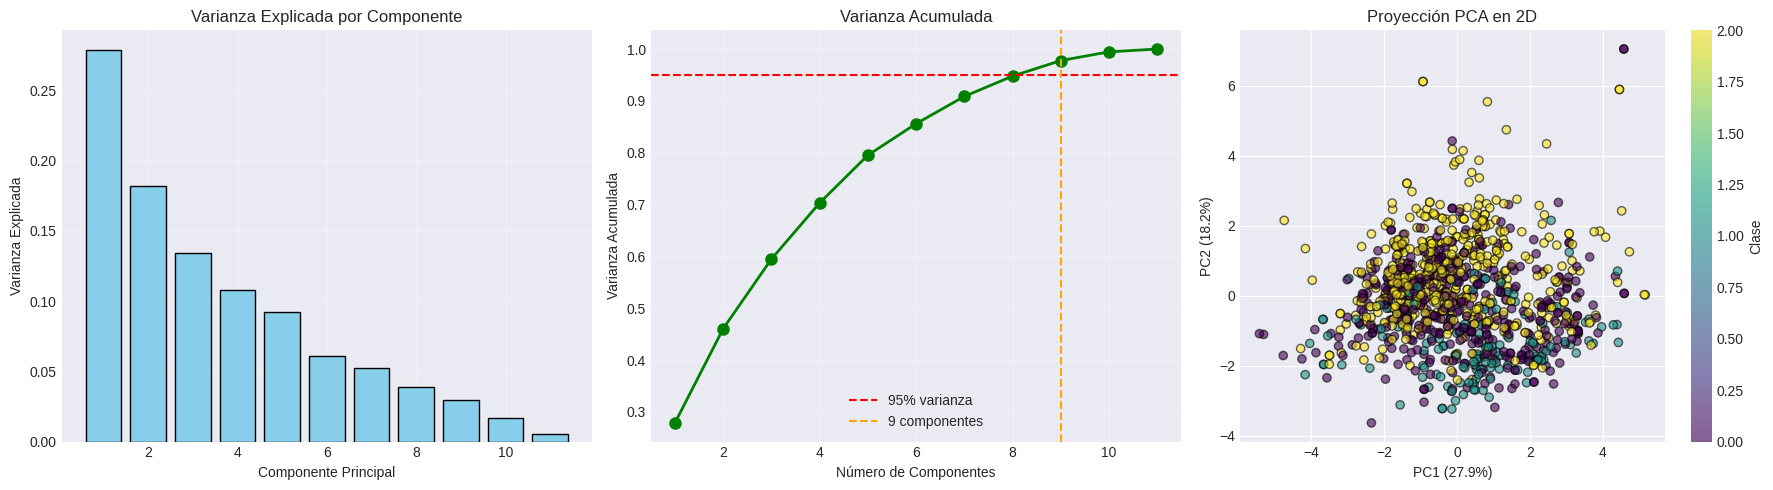


✓ Visualizaciones guardadas en 'pca_analisis.png'

Contribución de variables a las primeras 3 componentes:
                        PC1    PC2    PC3
fixed acidity         0.503 -0.094 -0.128
volatile acidity     -0.245  0.301 -0.410
citric acid           0.467 -0.174  0.239
residual sugar        0.157  0.281  0.139
chlorides             0.184  0.187 -0.092
free sulfur dioxide  -0.045  0.477  0.484
total sulfur dioxide  0.009  0.519  0.355
density               0.390  0.285 -0.310
pH                   -0.444  0.003  0.074
sulphates             0.224 -0.032  0.270
alcohol              -0.091 -0.422  0.443

Variables más importantes por componente:

PC1:
fixed acidity    0.503482
citric acid      0.466864
pH               0.444286
dtype: float64

PC2:
total sulfur dioxide    0.518738
free sulfur dioxide     0.476536
alcohol                 0.421682
dtype: float64

PC3:
free sulfur dioxide    0.483601
alcohol                0.442750
volatile acidity       0.410359
dtype: float64

CONCLUSI

In [ ]:
# ============================================
# PARTE 3: PREPROCESAMIENTO (Puntos 6-8)
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PUNTO 6: Tratamiento de datos faltantes y codificación
print("=" * 60)
print("PUNTO 6: PREPROCESAMIENTO DE DATOS")
print("=" * 60)

# Verificar datos faltantes
print("\nDatos faltantes antes del tratamiento:")
print(df.isnull().sum())

# Codificar variable objetivo
le = LabelEncoder()
y = le.fit_transform(df['quality_category'])
print(f"\nClases codificadas: {le.classes_}")
print(f"Mapeo: {dict(zip(le.classes_, range(len(le.classes_))))}")

# Seleccionar variables predictoras (todas numéricas excepto quality)
X = df.drop(['quality', 'quality_category'], axis=1)

print(f"\nForma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nEstadísticas después de estandarización:")
print(f"Media: {X_scaled.mean(axis=0)}")
print(f"Desviación estándar: {X_scaled.std(axis=0)}")

# PUNTO 7: División del dataset
print("\n" + "=" * 60)
print("PUNTO 7: DIVISIÓN DEL DATASET")
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nConjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

print(f"\nDistribución en entrenamiento:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, count in zip(le.classes_[unique], counts):
    print(f"  {cls}: {count} ({count/len(y_train)*100:.1f}%)")

print(f"\nDistribución en prueba:")
unique, counts = np.unique(y_test, return_counts=True)
for cls, count in zip(le.classes_[unique], counts):
    print(f"  {cls}: {count} ({count/len(y_test)*100:.1f}%)")

# PUNTO 8: Reducción de dimensionalidad (PCA)
print("\n" + "=" * 60)
print("PUNTO 8: REDUCCIÓN DE DIMENSIONALIDAD (PCA)")
print("=" * 60)

# PCA para ver varianza explicada
pca_full = PCA()
pca_full.fit(X_train)

# Varianza explicada
varianza_explicada = pca_full.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("\nVarianza explicada por componente:")
for i, (var, var_acum) in enumerate(zip(varianza_explicada, varianza_acumulada)):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%) - Acumulada: {var_acum:.4f} ({var_acum*100:.2f}%)")

# Determinar número óptimo de componentes (95% varianza)
n_components_95 = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"\nNúmero de componentes para 95% de varianza: {n_components_95}")

# Aplicar PCA con número óptimo de componentes
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"\nForma después de PCA:")
print(f"X_train_pca: {X_train_pca.shape}")
print(f"X_test_pca: {X_test_pca.shape}")

# Visualizaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Varianza explicada por componente
axes[0].bar(range(1, len(varianza_explicada)+1), varianza_explicada,
            color='skyblue', edgecolor='black')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Varianza Explicada')
axes[0].set_title('Varianza Explicada por Componente')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Varianza acumulada
axes[1].plot(range(1, len(varianza_acumulada)+1), varianza_acumulada,
             marker='o', linewidth=2, markersize=8, color='green')
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
axes[1].axvline(x=n_components_95, color='orange', linestyle='--',
                label=f'{n_components_95} componentes')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Varianza Acumulada')
axes[1].set_title('Varianza Acumulada')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Proyección en 2D (primeros 2 componentes)
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)

scatter = axes[2].scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                         c=y_train, cmap='viridis', alpha=0.6, edgecolors='black')
axes[2].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
axes[2].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
axes[2].set_title('Proyección PCA en 2D')
plt.colorbar(scatter, ax=axes[2], label='Clase')

plt.tight_layout()
plt.savefig('pca_analisis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizaciones guardadas en 'pca_analisis.png'")

# Contribución de variables originales a componentes principales
print("\nContribución de variables a las primeras 3 componentes:")
componentes_df = pd.DataFrame(
    pca.components_[:3].T,
    columns=[f'PC{i+1}' for i in range(3)],
    index=X.columns
)
print(componentes_df.round(3))

print("\nVariables más importantes por componente:")
for i in range(min(3, pca.n_components_)):
    print(f"\nPC{i+1}:")
    importancia = pd.Series(
        np.abs(pca.components_[i]),
        index=X.columns
    ).sort_values(ascending=False)
    print(importancia.head(3))

# Conclusiones PCA
print("\n" + "=" * 60)
print("CONCLUSIONES PCA:")
print("=" * 60)
conclusiones_pca = f"""
1. Se necesitan {n_components_95} componentes principales para explicar el 95%
   de la varianza en los datos.

2. La primera componente explica el {varianza_explicada[0]*100:.2f}% de la varianza,
   mientras que las dos primeras explican el {varianza_acumulada[1]*100:.2f}%.

3. Esto indica que existe cierta correlación entre las variables originales
   y que la dimensionalidad puede ser reducida sin perder mucha información.

4. La proyección 2D muestra cierta separación entre clases, aunque hay
   solapamiento considerable, lo que sugiere que el problema de clasificación
   tiene cierta complejidad.
"""
print(conclusiones_pca)

PUNTO 9: CLUSTERING CON K-MEANS

Resultados K-means para diferentes valores de k:
k     Inercia         Silhouette     
-----------------------------------
2     9878.70         0.2123         
3     8695.17         0.1916         
4     7834.69         0.2076         
5     7051.09         0.1911         
6     6433.22         0.1992         
7     5919.47         0.1943         
8     5694.16         0.1495         
9     5479.77         0.1523         

PUNTO 10: NÚMERO ÓPTIMO DE CLUSTERS


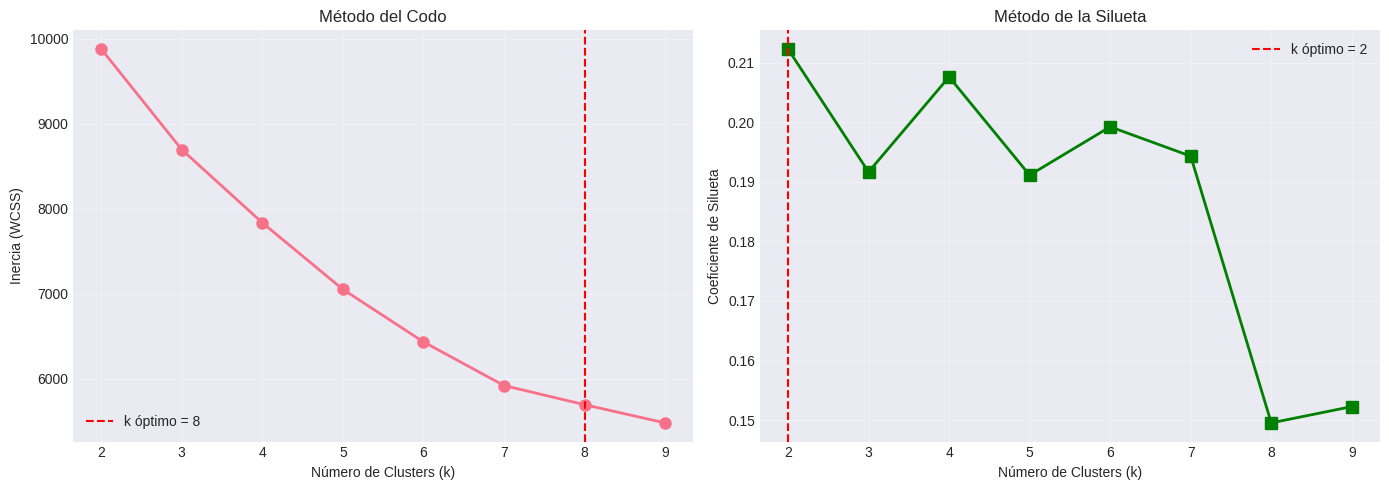


Método del codo sugiere: k = 8
Método de la silueta sugiere: k = 2

✓ Número óptimo de clusters seleccionado: 2

Distribución de observaciones por cluster:
  Cluster 0: 692 observaciones (61.8%)
  Cluster 1: 427 observaciones (38.2%)

Coeficiente de silueta promedio: 0.2123

PUNTO 11: VISUALIZACIÓN DE CLUSTERS


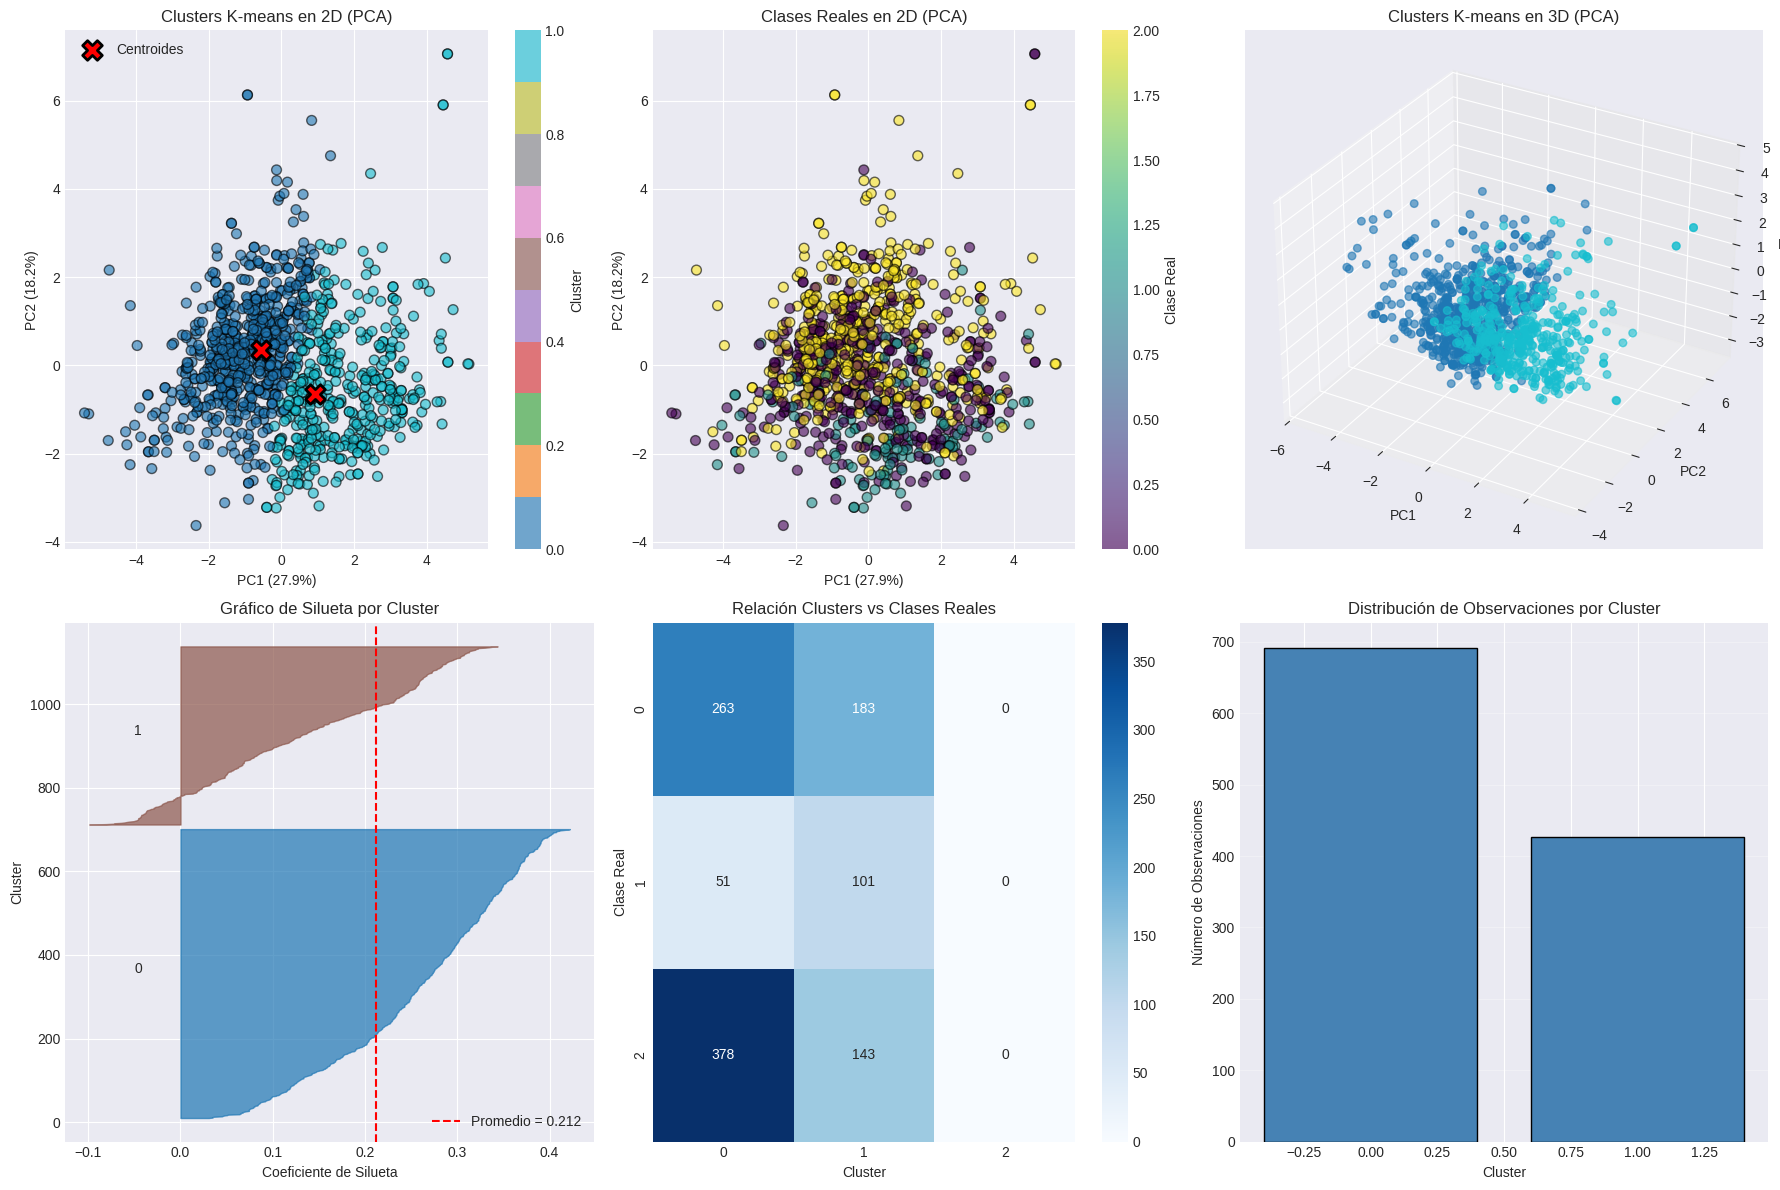

✓ Visualizaciones guardadas en 'clustering_visualizacion.png'

Análisis de clusters vs clases reales:

Matriz de confusión (Clases Reales vs Clusters):
[[263 183   0]
 [ 51 101   0]
 [378 143   0]]

Pureza de cada cluster:
  Cluster 0: 54.6% pureza (clase dominante: Malo)
  Cluster 1: 42.9% pureza (clase dominante: Bueno)

PUNTO 12: REDUCCIÓN DE DIMENSIONALIDAD NO SUPERVISADA

Aplicando t-SNE...
Aplicando UMAP...


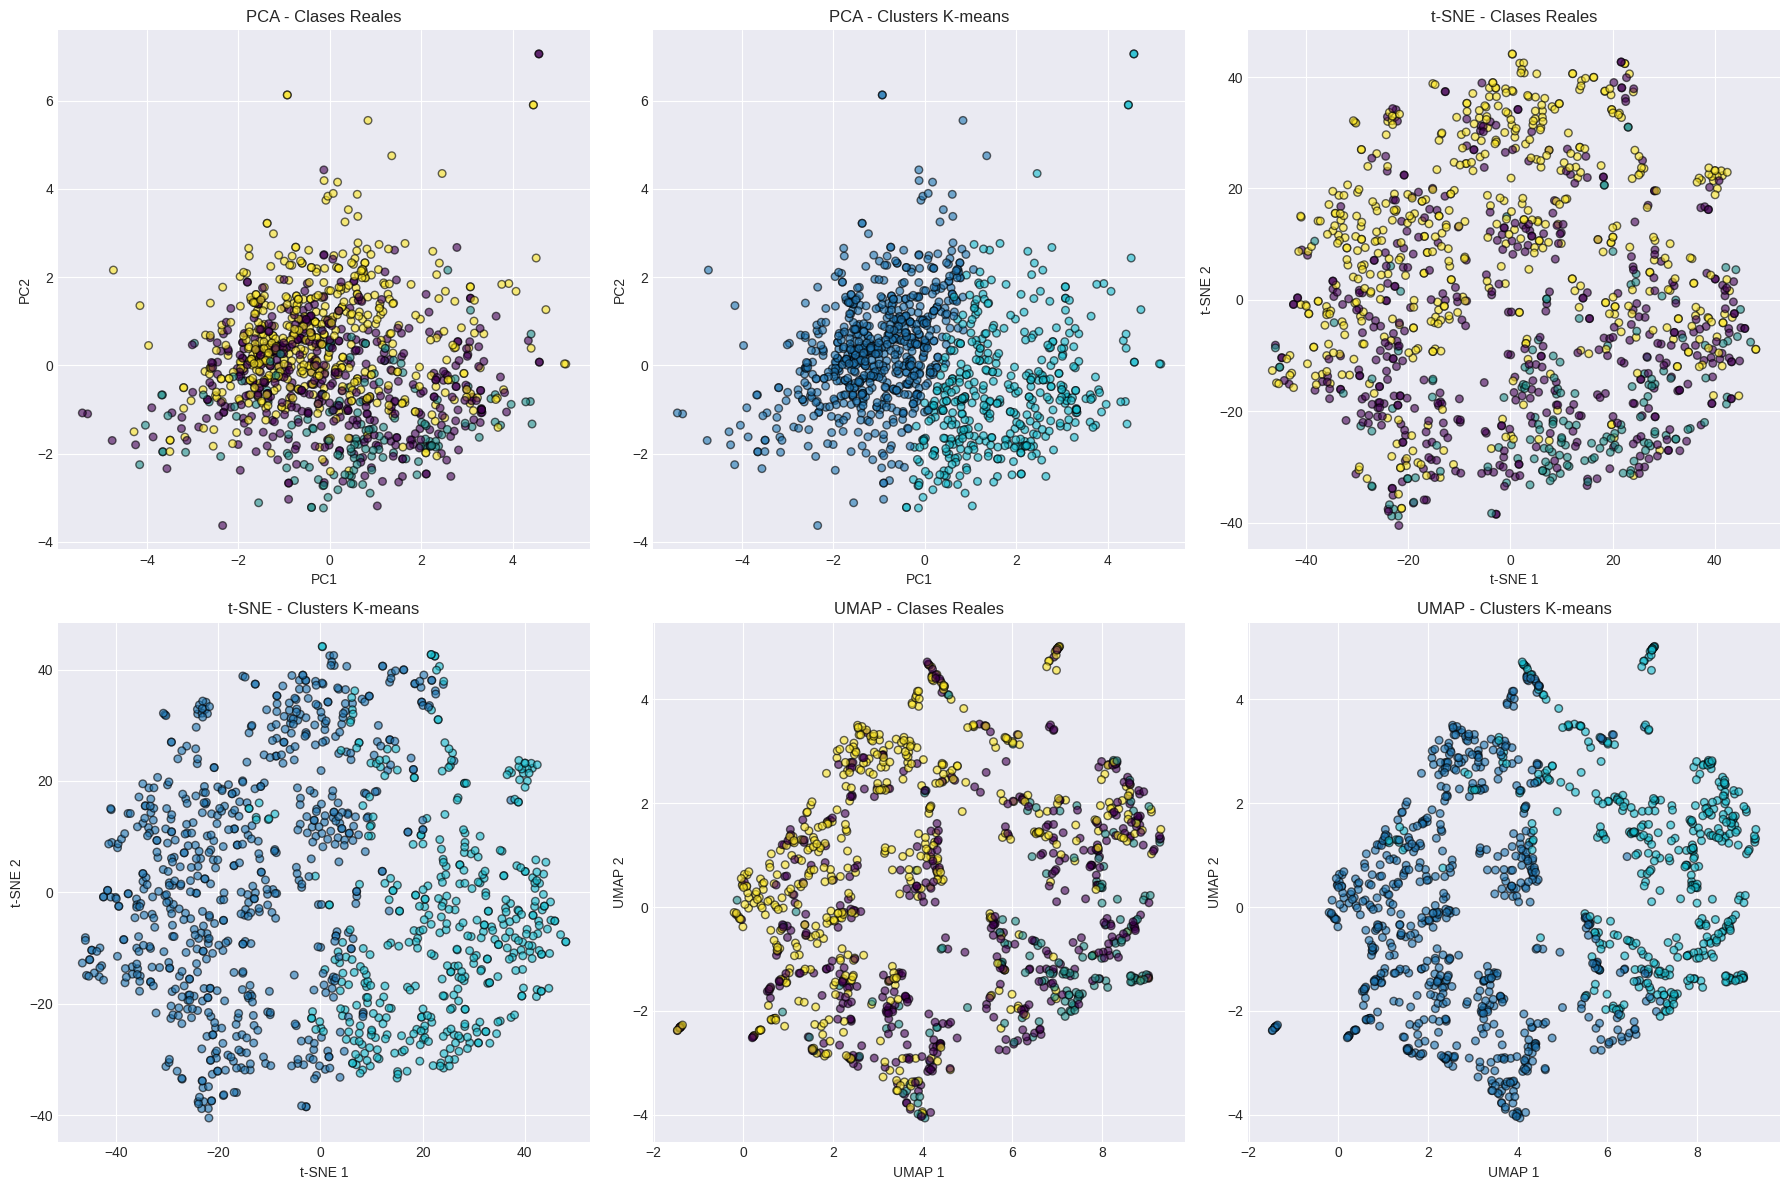

✓ Visualizaciones guardadas en 'reduccion_dimensionalidad.png'

ANÁLISIS COMPARATIVO DE TÉCNICAS DE REDUCCIÓN

1. PCA (Principal Component Analysis):
   - Es una técnica lineal que maximiza la varianza
   - Muestra una separación moderada entre clases
   - Los clusters K-means coinciden parcialmente con las clases reales
   - Mejor para entender la estructura global de los datos

2. t-SNE (t-Distributed Stochastic Neighbor Embedding):
   - Es una técnica no lineal que preserva estructuras locales
   - Muestra agrupaciones más definidas que PCA
   - Mejor para visualizar separaciones entre grupos
   - Más sensible a hiperparámetros (perplexity)

3. UMAP (Uniform Manifold Approximation and Projection):
   - También es no lineal, pero preserva tanto estructura local como global
   - Generalmente más rápido que t-SNE
   - Produce visualizaciones más compactas
   - Mejor balance entre estructura local y global

CONCLUSIÓN:
Las tres técnicas muestran cierta separación entre las clases de cal

In [ ]:
# ============================================
# PARTE 4: APRENDIZAJE NO SUPERVISADO (Puntos 9-12)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

# PUNTO 9: Aplicar K-means clustering
print("=" * 60)
print("PUNTO 9: CLUSTERING CON K-MEANS")
print("=" * 60)

# Aplicar K-means con diferentes números de clusters
k_values = range(2, 10)
inertias = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

print("\nResultados K-means para diferentes valores de k:")
print(f"{'k':<5} {'Inercia':<15} {'Silhouette':<15}")
print("-" * 35)
for k, inertia, sil in zip(k_values, inertias, silhouette_scores):
    print(f"{k:<5} {inertia:<15.2f} {sil:<15.4f}")

# PUNTO 10: Determinar número óptimo de clusters
print("\n" + "=" * 60)
print("PUNTO 10: NÚMERO ÓPTIMO DE CLUSTERS")
print("=" * 60)

# Método del codo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Método del codo
axes[0].plot(k_values, inertias, marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de Clusters (k)')
axes[0].set_ylabel('Inercia (WCSS)')
axes[0].set_title('Método del Codo')
axes[0].grid(True, alpha=0.3)

diffs = np.diff(inertias, 2)
optimal_k_elbow = k_values[np.argmin(diffs) + 1]
axes[0].axvline(x=optimal_k_elbow, color='red', linestyle='--',
                label=f'k óptimo = {optimal_k_elbow}')
axes[0].legend()

# Gráfico 2: Método de la silueta
axes[1].plot(k_values, silhouette_scores, marker='s', linewidth=2,
             markersize=8, color='green')
axes[1].set_xlabel('Número de Clusters (k)')
axes[1].set_ylabel('Coeficiente de Silueta')
axes[1].set_title('Método de la Silueta')
axes[1].grid(True, alpha=0.3)

# Marcar el máximo
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
axes[1].axvline(x=optimal_k_silhouette, color='red', linestyle='--',
                label=f'k óptimo = {optimal_k_silhouette}')
axes[1].legend()

plt.tight_layout()
plt.savefig('optimal_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nMétodo del codo sugiere: k = {optimal_k_elbow}")
print(f"Método de la silueta sugiere: k = {optimal_k_silhouette}")

# Seleccionar k óptimo (usaremos el de silueta)
optimal_k = optimal_k_silhouette
print(f"\n✓ Número óptimo de clusters seleccionado: {optimal_k}")

# Aplicar K-means con k óptimo
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_train)

print(f"\nDistribución de observaciones por cluster:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} observaciones ({count/len(cluster_labels)*100:.1f}%)")

# Análisis de silueta detallado
silhouette_avg = silhouette_score(X_train, cluster_labels)
print(f"\nCoeficiente de silueta promedio: {silhouette_avg:.4f}")

# PUNTO 11: Visualizar clusters
print("\n" + "=" * 60)
print("PUNTO 11: VISUALIZACIÓN DE CLUSTERS")
print("=" * 60)

# Visualización en 2D y 3D
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)

pca_3d = PCA(n_components=3)
X_train_3d = pca_3d.fit_transform(X_train)

fig = plt.figure(figsize=(18, 12))

# Subplot 1: Clusters en 2D
ax1 = plt.subplot(2, 3, 1)
scatter1 = ax1.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                       c=cluster_labels, cmap='tab10', alpha=0.6,
                       edgecolors='black', s=50)
ax1.scatter(kmeans_final.cluster_centers_[:, 0],
            kmeans_final.cluster_centers_[:, 1],
            c='red', marker='X', s=200, edgecolors='black',
            linewidths=2, label='Centroides')
ax1.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
ax1.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
ax1.set_title('Clusters K-means en 2D (PCA)')
ax1.legend()
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Subplot 2: Clases reales en 2D
ax2 = plt.subplot(2, 3, 2)
scatter2 = ax2.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                       c=y_train, cmap='viridis', alpha=0.6,
                       edgecolors='black', s=50)
ax2.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
ax2.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
ax2.set_title('Clases Reales en 2D (PCA)')
plt.colorbar(scatter2, ax=ax2, label='Clase Real')

# Subplot 3: Clusters en 3D
ax3 = plt.subplot(2, 3, 3, projection='3d')
scatter3 = ax3.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2],
                       c=cluster_labels, cmap='tab10', alpha=0.6, s=30)
ax3.set_xlabel(f'PC1')
ax3.set_ylabel(f'PC2')
ax3.set_zlabel(f'PC3')
ax3.set_title('Clusters K-means en 3D (PCA)')

# Subplot 4: Gráfico de silueta
ax4 = plt.subplot(2, 3, 4)
silhouette_vals = silhouette_samples(X_train, cluster_labels)
y_lower = 10
for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.tab10(i / optimal_k)
    ax4.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax4.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax4.set_xlabel('Coeficiente de Silueta')
ax4.set_ylabel('Cluster')
ax4.set_title('Gráfico de Silueta por Cluster')
ax4.axvline(x=silhouette_avg, color='red', linestyle='--',
            label=f'Promedio = {silhouette_avg:.3f}')
ax4.legend()

# Subplot 5: Análisis cluster vs clase real
ax5 = plt.subplot(2, 3, 5)
# Matriz de confusión entre clusters y clases reales
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, cluster_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax5)
ax5.set_xlabel('Cluster')
ax5.set_ylabel('Clase Real')
ax5.set_title('Relación Clusters vs Clases Reales')

# Subplot 6: Distribución por cluster
ax6 = plt.subplot(2, 3, 6)
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
ax6.bar(cluster_counts.index, cluster_counts.values,
        color='steelblue', edgecolor='black')
ax6.set_xlabel('Cluster')
ax6.set_ylabel('Número de Observaciones')
ax6.set_title('Distribución de Observaciones por Cluster')
ax6.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('clustering_visualizacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualizaciones guardadas en 'clustering_visualizacion.png'")

# Análisis de la relación clusters vs clases reales
print("\nAnálisis de clusters vs clases reales:")
print("\nMatriz de confusión (Clases Reales vs Clusters):")
print(conf_matrix)

# Calcular pureza de cada cluster
print("\nPureza de cada cluster:")
for i in range(optimal_k):
    cluster_mask = cluster_labels == i
    cluster_classes = y_train[cluster_mask]
    if len(cluster_classes) > 0:
        most_common_class = np.bincount(cluster_classes).argmax()
        purity = np.sum(cluster_classes == most_common_class) / len(cluster_classes)
        print(f"  Cluster {i}: {purity*100:.1f}% pureza (clase dominante: {le.classes_[most_common_class]})")

# PUNTO 12: Reducción de dimensionalidad no supervisada (t-SNE y UMAP)
print("\n" + "=" * 60)
print("PUNTO 12: REDUCCIÓN DE DIMENSIONALIDAD NO SUPERVISADA")
print("=" * 60)

# t-SNE
print("\nAplicando t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_train_tsne = tsne.fit_transform(X_train)

# UMAP (si está instalado, sino usamos solo t-SNE)
try:
    import umap
    print("Aplicando UMAP...")
    umap_model = umap.UMAP(n_components=2, random_state=42)
    X_train_umap = umap_model.fit_transform(X_train)
    usar_umap = True
except ImportError:
    print("UMAP no instalado. Instalando...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'umap-learn', '-q'])
    import umap
    umap_model = umap.UMAP(n_components=2, random_state=42)
    X_train_umap = umap_model.fit_transform(X_train)
    usar_umap = True

# Visualizaciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Fila 1: PCA
axes[0, 0].scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                   c=y_train, cmap='viridis', alpha=0.6, edgecolors='black', s=30)
axes[0, 0].set_title('PCA - Clases Reales')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')

axes[0, 1].scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                   c=cluster_labels, cmap='tab10', alpha=0.6, edgecolors='black', s=30)
axes[0, 1].set_title('PCA - Clusters K-means')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')

# Fila 2: t-SNE
axes[0, 2].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],
                   c=y_train, cmap='viridis', alpha=0.6, edgecolors='black', s=30)
axes[0, 2].set_title('t-SNE - Clases Reales')
axes[0, 2].set_xlabel('t-SNE 1')
axes[0, 2].set_ylabel('t-SNE 2')

axes[1, 0].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],
                   c=cluster_labels, cmap='tab10', alpha=0.6, edgecolors='black', s=30)
axes[1, 0].set_title('t-SNE - Clusters K-means')
axes[1, 0].set_xlabel('t-SNE 1')
axes[1, 0].set_ylabel('t-SNE 2')

# Fila 3: UMAP
if usar_umap:
    axes[1, 1].scatter(X_train_umap[:, 0], X_train_umap[:, 1],
                       c=y_train, cmap='viridis', alpha=0.6, edgecolors='black', s=30)
    axes[1, 1].set_title('UMAP - Clases Reales')
    axes[1, 1].set_xlabel('UMAP 1')
    axes[1, 1].set_ylabel('UMAP 2')

    axes[1, 2].scatter(X_train_umap[:, 0], X_train_umap[:, 1],
                       c=cluster_labels, cmap='tab10', alpha=0.6, edgecolors='black', s=30)
    axes[1, 2].set_title('UMAP - Clusters K-means')
    axes[1, 2].set_xlabel('UMAP 1')
    axes[1, 2].set_ylabel('UMAP 2')

plt.tight_layout()
plt.savefig('reduccion_dimensionalidad.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualizaciones guardadas en 'reduccion_dimensionalidad.png'")

# Análisis comparativo
print("\n" + "=" * 60)
print("ANÁLISIS COMPARATIVO DE TÉCNICAS DE REDUCCIÓN")
print("=" * 60)

analisis = """
1. PCA:
   - Es una técnica lineal que maximiza la varianza

2. t-SNE:
   - Es una técnica no lineal que preserva estructuras locales

3. UMAP:
   - También es no lineal, pero preserva tanto estructura local como global

CONCLUSIÓN:
Las tres técnicas muestran cierta separación entre las clases de calidad
del vino, aunque con solapamiento. Esto sugiere que:
- Las clases no son perfectamente separables en el espacio de características
- Existe información útil para la clasificación
- Los modelos supervisados deberían lograr mejor rendimiento que clustering
"""
print(analisis)

# Aplicar DBSCAN como clustering alternativo
print("\n" + "=" * 60)
print("CLUSTERING ALTERNATIVO: DBSCAN")
print("=" * 60)

from sklearn.neighbors import NearestNeighbors

# Determinar eps óptimo usando k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_train)
distances, indices = neighbors_fit.kneighbors(X_train)
distances = np.sort(distances[:, -1], axis=0)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nNúmero de clusters encontrados: {n_clusters_dbscan}")
print(f"Número de puntos de ruido: {n_noise} ({n_noise/len(dbscan_labels)*100:.1f}%)")

if n_clusters_dbscan > 1:
    # Calcular silueta solo para puntos no-ruido
    mask = dbscan_labels != -1
    if mask.sum() > 0:
        silhouette_dbscan = silhouette_score(X_train[mask], dbscan_labels[mask])
        print(f"Coeficiente de silueta (sin ruido): {silhouette_dbscan:.4f}")

print("\n" + "=" * 60)
print("FIN DEL APRENDIZAJE NO SUPERVISADO")
print("=" * 60)

PUNTO 13: ENTRENAMIENTO DE MODELOS DE CLASIFICACIÓN

Entrenando modelos...

Entrenando Árbol de Decisión...
  ✓ Accuracy: 0.6333
Entrenando Random Forest...
  ✓ Accuracy: 0.7000
Entrenando Regresión Logística...
  ✓ Accuracy: 0.6396
Entrenando KNN...
  ✓ Accuracy: 0.6062
Entrenando SVM...
  ✓ Accuracy: 0.6729
Entrenando Naive Bayes...
  ✓ Accuracy: 0.5708

✓ Todos los modelos entrenados exitosamente

PUNTO 14: COMPARACIÓN DE RENDIMIENTO DE MODELOS

Tabla comparativa de métricas:
             Modelo  Accuracy  Precision   Recall  F1-Score
      Random Forest  0.700000   0.697882 0.700000  0.696450
                SVM  0.672917   0.673264 0.672917  0.656684
  Árbol de Decisión  0.633333   0.635124 0.633333  0.633547
Regresión Logística  0.639583   0.629283 0.639583  0.626301
                KNN  0.606250   0.604661 0.606250  0.602924
        Naive Bayes  0.570833   0.569790 0.570833  0.568755


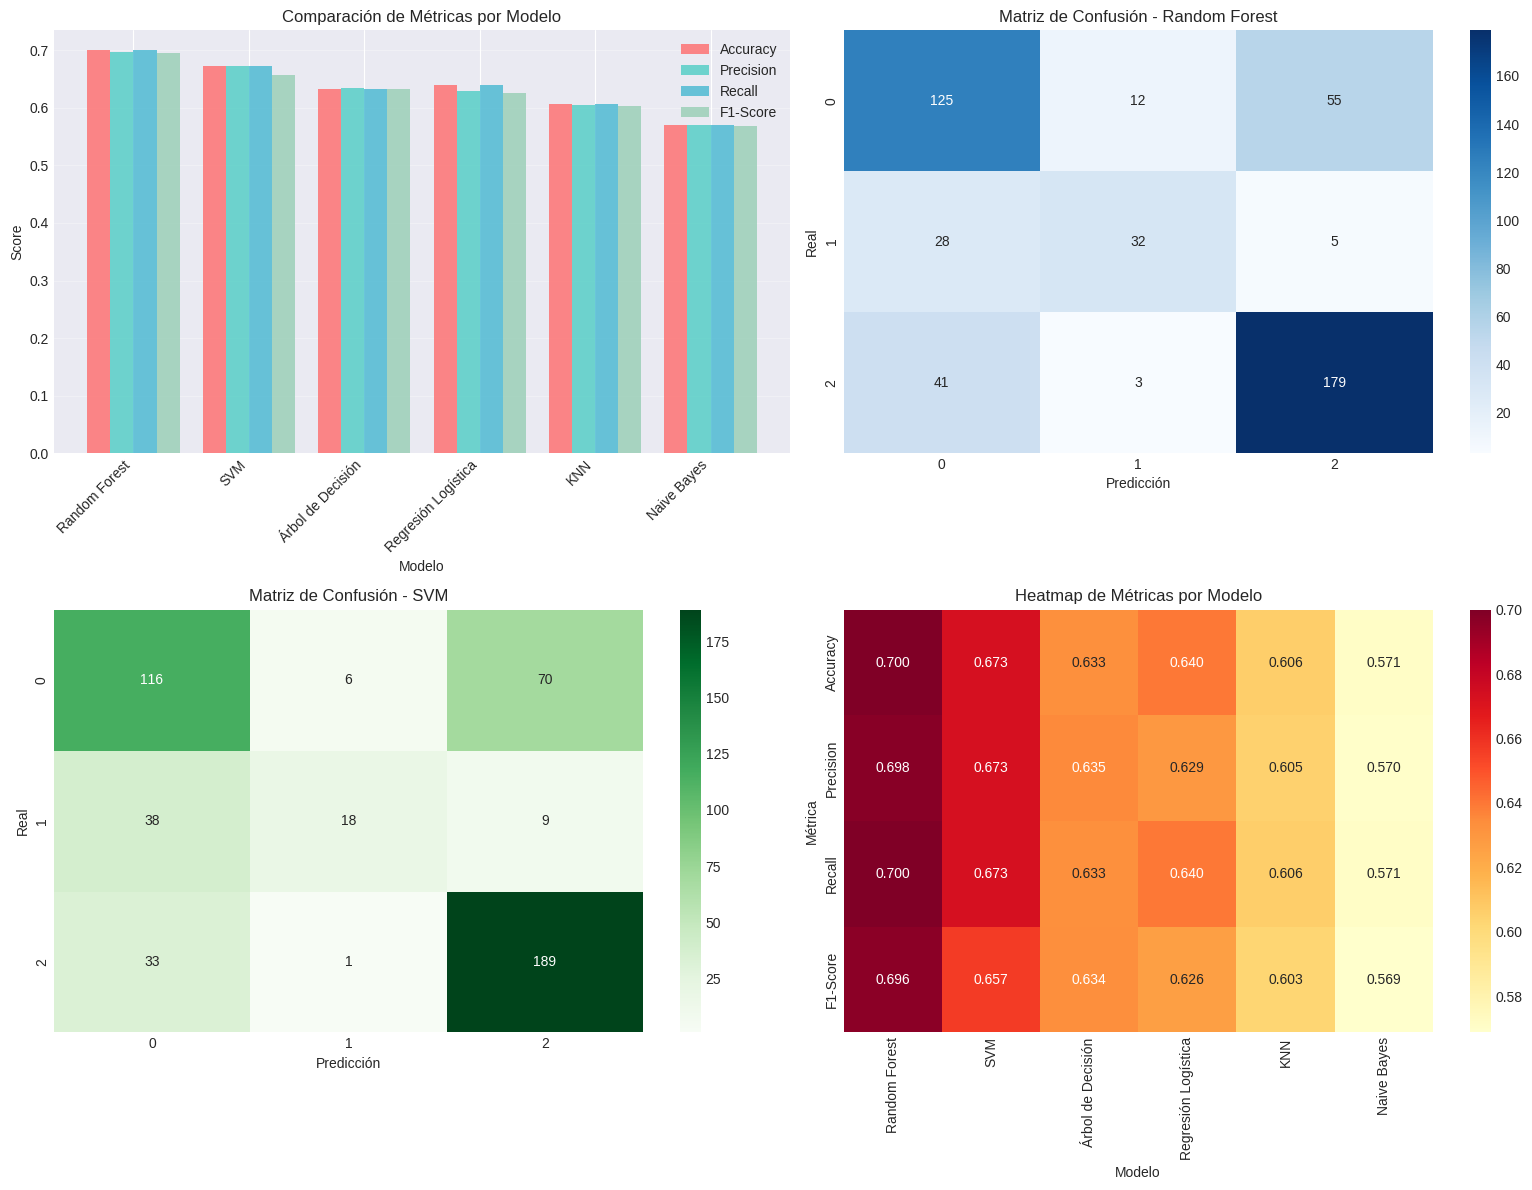


✓ Visualizaciones guardadas en 'comparacion_modelos.png'

REPORTES DE CLASIFICACIÓN DETALLADOS

Random Forest:
------------------------------------------------------------
              precision    recall  f1-score   support

       Bueno       0.64      0.65      0.65       192
   Excelente       0.68      0.49      0.57        65
        Malo       0.75      0.80      0.77       223

    accuracy                           0.70       480
   macro avg       0.69      0.65      0.66       480
weighted avg       0.70      0.70      0.70       480


SVM:
------------------------------------------------------------
              precision    recall  f1-score   support

       Bueno       0.62      0.60      0.61       192
   Excelente       0.72      0.28      0.40        65
        Malo       0.71      0.85      0.77       223

    accuracy                           0.67       480
   macro avg       0.68      0.58      0.59       480
weighted avg       0.67      0.67      0.66       480

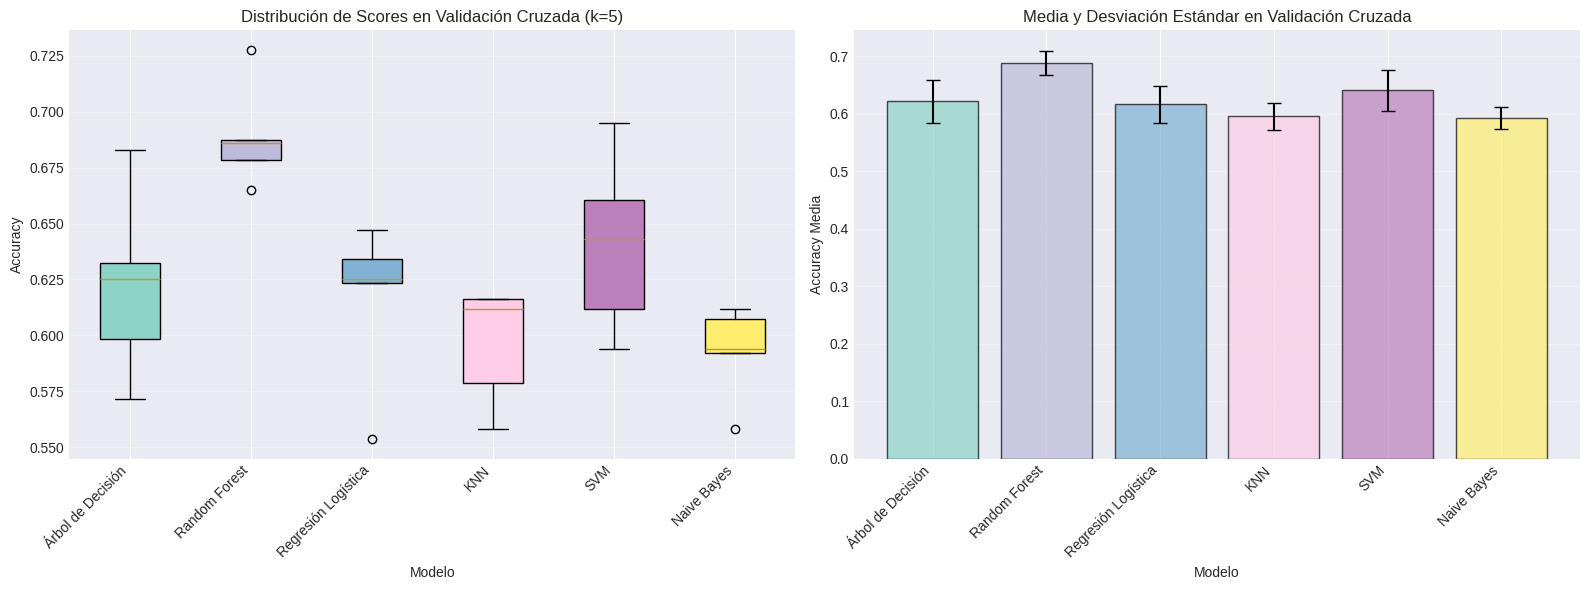

✓ Visualizaciones guardadas en 'validacion_cruzada.png'

ANÁLISIS DE ESTABILIDAD DE MODELOS

Comparación CV vs Test:
             Modelo  CV Media   CV Std  Test Accuracy  Diferencia
  Árbol de Decisión  0.621993 0.037319       0.633333    0.011340
      Random Forest  0.689005 0.020895       0.700000    0.010995
Regresión Logística  0.616628 0.032657       0.639583    0.022955
                KNN  0.596052 0.023655       0.606250    0.010198
                SVM  0.640799 0.035810       0.672917    0.032117
        Naive Bayes  0.592493 0.018810       0.570833    0.021659

Interpretación:
  Árbol de Decisión: Muy estable (diferencia = 0.0113)
  Random Forest: Muy estable (diferencia = 0.0110)
  Regresión Logística: Estable (diferencia = 0.0230)
  KNN: Muy estable (diferencia = 0.0102)
  SVM: Estable (diferencia = 0.0321)
  Naive Bayes: Estable (diferencia = 0.0217)

PUNTO 16: AJUSTE DE HIPERPARÁMETROS (GRID SEARCH)

Optimizando hiperparámetros de: Random Forest

Ejecutando Grid Search 

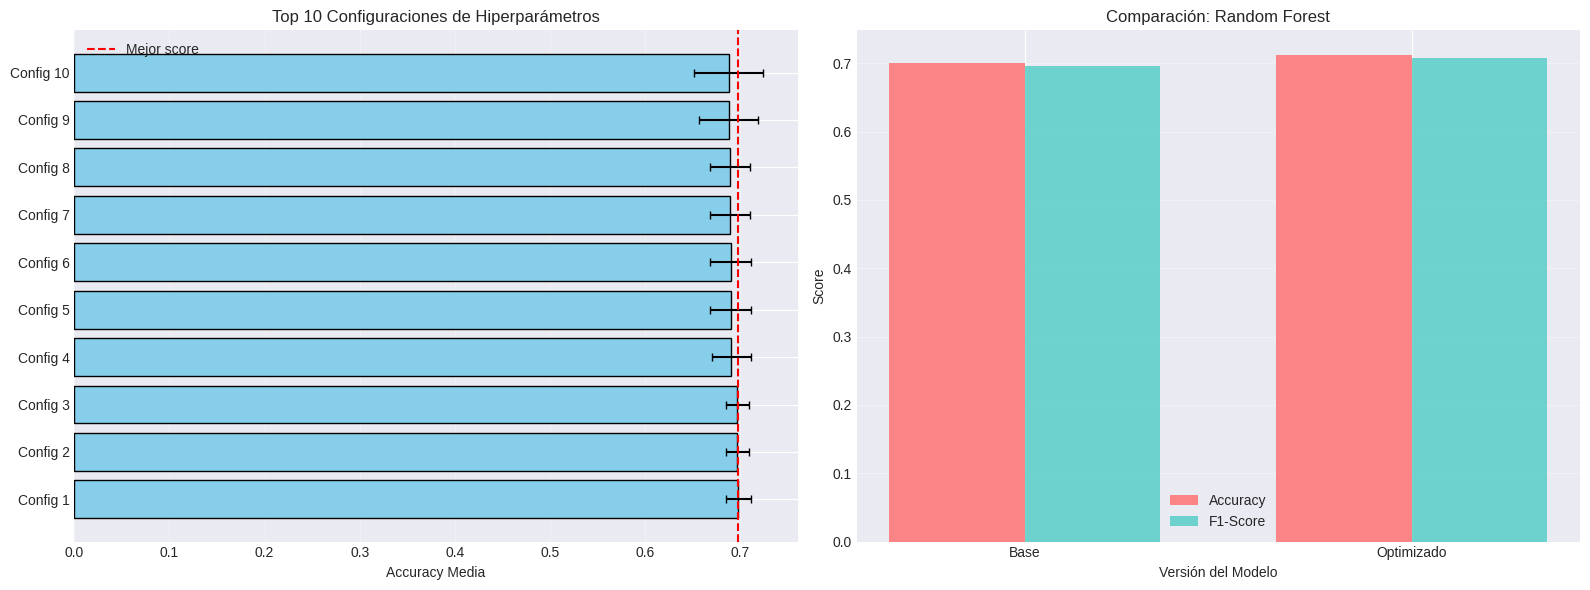


✓ Visualizaciones guardadas en 'grid_search_resultados.png'

PUNTO 17: IMPORTANCIA DE VARIABLES

Feature Importance:
            Variable  Importancia
             alcohol     0.147911
           sulphates     0.117885
    volatile acidity     0.108467
total sulfur dioxide     0.098816
             density     0.097882
           chlorides     0.079517
         citric acid     0.077141
       fixed acidity     0.072706
                  pH     0.071775
 free sulfur dioxide     0.064376
      residual sugar     0.063524


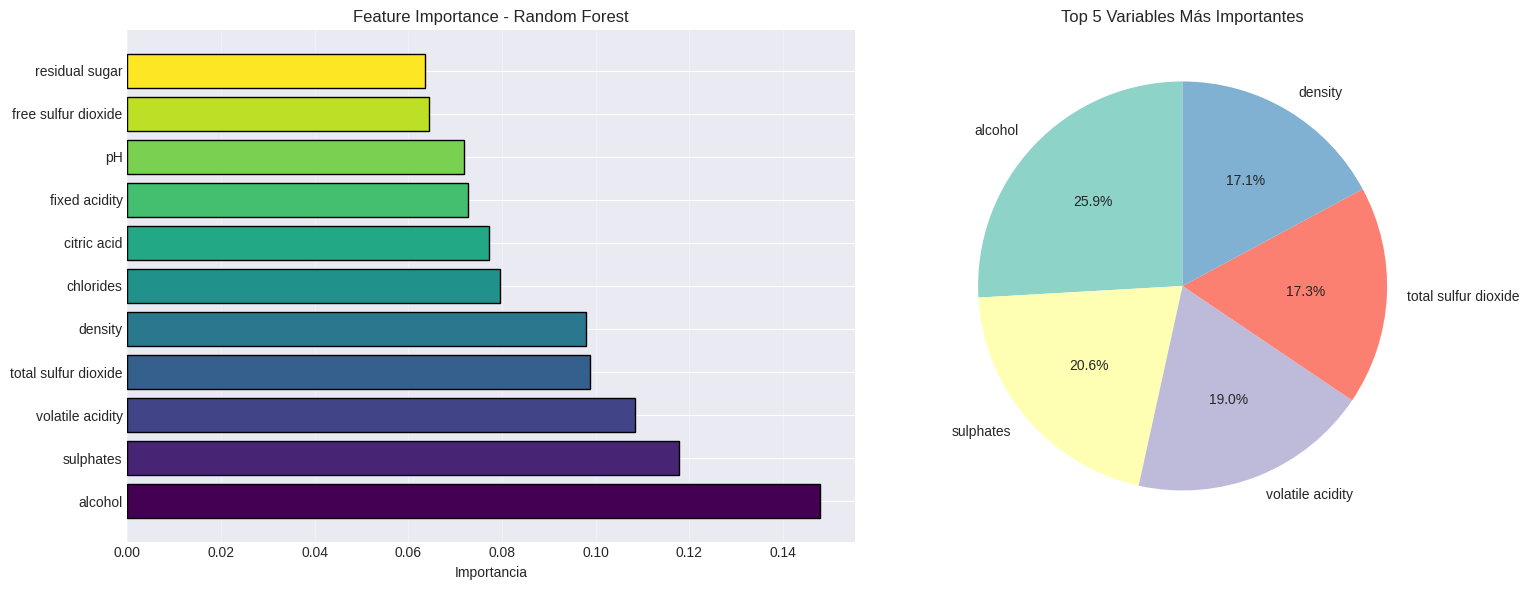


✓ Visualizaciones guardadas en 'importancia_variables.png'

ANÁLISIS DE VARIABLES MÁS IMPORTANTES

Top 3 variables más importantes:
1. alcohol: 0.1479
2. sulphates: 0.1179
3. volatile acidity: 0.1085


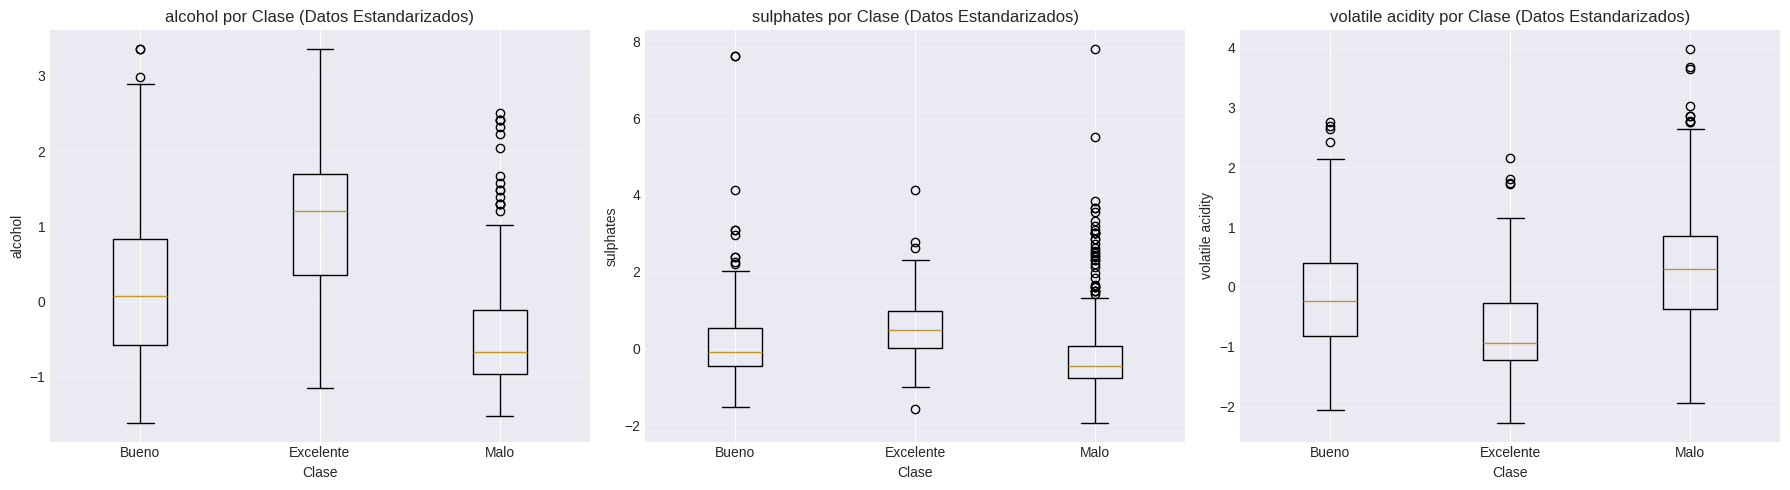


✓ Visualizaciones guardadas en 'top_variables_analisis.png'

FIN DEL APRENDIZAJE SUPERVISADO


In [ ]:
# ============================================
# PARTE 5: APRENDIZAJE SUPERVISADO (Puntos 13-17)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# PUNTO 13: Entrenar múltiples modelos de clasificación
print("=" * 60)
print("PUNTO 13: ENTRENAMIENTO DE MODELOS DE CLASIFICACIÓN")
print("=" * 60)

# Definir modelos a entrenar
modelos = {
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Regresión Logística': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB()
}

# Diccionario para almacenar resultados
resultados = {}

print("\nEntrenando modelos...\n")

for nombre, modelo in modelos.items():
    print(f"Entrenando {nombre}...")

    # Entrenar modelo
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test) if hasattr(modelo, 'predict_proba') else None

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Guardar resultados
    resultados[nombre] = {
        'modelo': modelo,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    print(f"  ✓ Accuracy: {accuracy:.4f}")

print("\n✓ Todos los modelos entrenados exitosamente")

# PUNTO 14: Comparar rendimiento de modelos
print("\n" + "=" * 60)
print("PUNTO 14: COMPARACIÓN DE RENDIMIENTO DE MODELOS")
print("=" * 60)

# Crear tabla comparativa
comparacion_df = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'Accuracy': [r['accuracy'] for r in resultados.values()],
    'Precision': [r['precision'] for r in resultados.values()],
    'Recall': [r['recall'] for r in resultados.values()],
    'F1-Score': [r['f1'] for r in resultados.values()]
})

comparacion_df = comparacion_df.sort_values('F1-Score', ascending=False)
print("\nTabla comparativa de métricas:")
print(comparacion_df.to_string(index=False))

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparación de métricas
ax1 = axes[0, 0]
x = np.arange(len(comparacion_df))
width = 0.2
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, comparacion_df[metric], width,
            label=metric, color=colors[i], alpha=0.8)

ax1.set_xlabel('Modelo')
ax1.set_ylabel('Score')
ax1.set_title('Comparación de Métricas por Modelo')
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(comparacion_df['Modelo'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Matrices de confusión de los 2 mejores modelos
mejor_modelo_nombre = comparacion_df.iloc[0]['Modelo']
segundo_modelo_nombre = comparacion_df.iloc[1]['Modelo']

ax2 = axes[0, 1]
cm1 = confusion_matrix(y_test, resultados[mejor_modelo_nombre]['y_pred'])
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title(f'Matriz de Confusión - {mejor_modelo_nombre}')
ax2.set_xlabel('Predicción')
ax2.set_ylabel('Real')

ax3 = axes[1, 0]
cm2 = confusion_matrix(y_test, resultados[segundo_modelo_nombre]['y_pred'])
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', ax=ax3)
ax3.set_title(f'Matriz de Confusión - {segundo_modelo_nombre}')
ax3.set_xlabel('Predicción')
ax3.set_ylabel('Real')

# Gráfico 3: Heatmap de todas las métricas
ax4 = axes[1, 1]
metricas_matrix = comparacion_df.set_index('Modelo')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].T
sns.heatmap(metricas_matrix, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax4)
ax4.set_title('Heatmap de Métricas por Modelo')
ax4.set_xlabel('Modelo')
ax4.set_ylabel('Métrica')

plt.tight_layout()
plt.savefig('comparacion_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizaciones guardadas en 'comparacion_modelos.png'")

# Reportes de clasificación detallados
print("\n" + "=" * 60)
print("REPORTES DE CLASIFICACIÓN DETALLADOS")
print("=" * 60)

for nombre in [mejor_modelo_nombre, segundo_modelo_nombre]:
    print(f"\n{nombre}:")
    print("-" * 60)
    print(classification_report(y_test, resultados[nombre]['y_pred'],
                                target_names=le.classes_))

# PUNTO 15: Validación cruzada
print("\n" + "=" * 60)
print("PUNTO 15: VALIDACIÓN CRUZADA (K-FOLD)")
print("=" * 60)

print("\nAplicando validación cruzada con k=5...\n")

cv_resultados = {}

for nombre, modelo in modelos.items():
    # Validación cruzada con 5 folds
    cv_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')

    cv_resultados[nombre] = {
        'scores': cv_scores,
        'mean': cv_scores.mean(),
        'std': cv_scores.std()
    }

    print(f"{nombre}:")
    print(f"  Scores: {cv_scores}")
    print(f"  Media: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print()

# Visualización de validación cruzada
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Boxplot de scores
ax1 = axes[0]
cv_data = [cv_resultados[nombre]['scores'] for nombre in modelos.keys()]
bp = ax1.boxplot(cv_data, labels=modelos.keys(), patch_artist=True)

# Colorear boxplots
colors = plt.cm.Set3(np.linspace(0, 1, len(modelos)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_xlabel('Modelo')
ax1.set_ylabel('Accuracy')
ax1.set_title('Distribución de Scores en Validación Cruzada (k=5)')
ax1.grid(True, alpha=0.3, axis='y')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Gráfico 2: Media y desviación estándar
ax2 = axes[1]
nombres = list(cv_resultados.keys())
means = [cv_resultados[n]['mean'] for n in nombres]
stds = [cv_resultados[n]['std'] for n in nombres]

x_pos = np.arange(len(nombres))
ax2.bar(x_pos, means, yerr=stds, capsize=5, alpha=0.7,
        color=colors, edgecolor='black')
ax2.set_xlabel('Modelo')
ax2.set_ylabel('Accuracy Media')
ax2.set_title('Media y Desviación Estándar en Validación Cruzada')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(nombres, rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('validacion_cruzada.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizaciones guardadas en 'validacion_cruzada.png'")

# Análisis de estabilidad
print("\n" + "=" * 60)
print("ANÁLISIS DE ESTABILIDAD DE MODELOS")
print("=" * 60)

estabilidad_df = pd.DataFrame({
    'Modelo': nombres,
    'CV Media': means,
    'CV Std': stds,
    'Test Accuracy': [resultados[n]['accuracy'] for n in nombres],
    'Diferencia': [abs(cv_resultados[n]['mean'] - resultados[n]['accuracy']) for n in nombres]
})

print("\nComparación CV vs Test:")
print(estabilidad_df.to_string(index=False))

print("\nInterpretación:")
for nombre in nombres:
    cv_mean = cv_resultados[nombre]['mean']
    test_acc = resultados[nombre]['accuracy']
    diff = abs(cv_mean - test_acc)

    if diff < 0.02:
        estabilidad = "Muy estable"
    elif diff < 0.05:
        estabilidad = "Estable"
    else:
        estabilidad = "Menos estable"

    print(f"  {nombre}: {estabilidad} (diferencia = {diff:.4f})")

# PUNTO 16: Ajuste de hiperparámetros (Grid Search)
print("\n" + "=" * 60)
print("PUNTO 16: AJUSTE DE HIPERPARÁMETROS (GRID SEARCH)")
print("=" * 60)

# Seleccionar el mejor modelo para optimizar
modelo_optimizar = mejor_modelo_nombre
print(f"\nOptimizando hiperparámetros de: {modelo_optimizar}\n")

# Definir grids de parámetros según el modelo
if 'Random Forest' in modelo_optimizar:
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    modelo_base = RandomForestClassifier(random_state=42)

elif 'Árbol' in modelo_optimizar:
    param_grid = {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'criterion': ['gini', 'entropy']
    }
    modelo_base = DecisionTreeClassifier(random_state=42)

elif 'KNN' in modelo_optimizar:
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    modelo_base = KNeighborsClassifier()

elif 'SVM' in modelo_optimizar:
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
    modelo_base = SVC(random_state=42, probability=True)

else:  # Logistic Regression
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'saga'],
        'max_iter': [1000, 2000]
    }
    modelo_base = LogisticRegression(random_state=42)

# Aplicar Grid Search
print("Ejecutando Grid Search (esto puede tomar unos minutos)...")
grid_search = GridSearchCV(
    estimator=modelo_base,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n" + "=" * 60)
print("RESULTADOS DE GRID SEARCH")
print("=" * 60)

print(f"\nMejores parámetros encontrados:")
for param, valor in grid_search.best_params_.items():
    print(f"  {param}: {valor}")

print(f"\nMejor score en CV: {grid_search.best_score_:.4f}")

# Evaluar modelo optimizado en test
y_pred_optimizado = grid_search.best_estimator_.predict(X_test)
accuracy_optimizado = accuracy_score(y_test, y_pred_optimizado)
f1_optimizado = f1_score(y_test, y_pred_optimizado, average='weighted')

print(f"\nRendimiento en conjunto de prueba:")
print(f"  Accuracy: {accuracy_optimizado:.4f}")
print(f"  F1-Score: {f1_optimizado:.4f}")

print(f"\nMejora respecto al modelo base:")
accuracy_base = resultados[modelo_optimizar]['accuracy']
f1_base = resultados[modelo_optimizar]['f1']
print(f"  Accuracy: {accuracy_base:.4f} → {accuracy_optimizado:.4f} ({(accuracy_optimizado-accuracy_base)*100:.2f}%)")
print(f"  F1-Score: {f1_base:.4f} → {f1_optimizado:.4f} ({(f1_optimizado-f1_base)*100:.2f}%)")

# Visualizar resultados de Grid Search
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values('rank_test_score').head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Top 10 configuraciones
ax1 = axes[0]
top_10_scores = results_df['mean_test_score'].values
top_10_stds = results_df['std_test_score'].values
x_pos = np.arange(len(top_10_scores))

ax1.barh(x_pos, top_10_scores, xerr=top_10_stds, capsize=3,
         color='skyblue', edgecolor='black')
ax1.set_yticks(x_pos)
ax1.set_yticklabels([f'Config {i+1}' for i in range(len(top_10_scores))])
ax1.set_xlabel('Accuracy Media')
ax1.set_title('Top 10 Configuraciones de Hiperparámetros')
ax1.axvline(x=grid_search.best_score_, color='red', linestyle='--',
            label='Mejor score')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# Gráfico 2: Comparación antes/después
ax2 = axes[1]
comparison = pd.DataFrame({
    'Modelo': ['Base', 'Optimizado'],
    'Accuracy': [accuracy_base, accuracy_optimizado],
    'F1-Score': [f1_base, f1_optimizado]
})

x = np.arange(2)
width = 0.35

ax2.bar(x - width/2, comparison['Accuracy'], width, label='Accuracy',
        color='#FF6B6B', alpha=0.8)
ax2.bar(x + width/2, comparison['F1-Score'], width, label='F1-Score',
        color='#4ECDC4', alpha=0.8)

ax2.set_xlabel('Versión del Modelo')
ax2.set_ylabel('Score')
ax2.set_title(f'Comparación: {modelo_optimizar}')
ax2.set_xticks(x)
ax2.set_xticklabels(comparison['Modelo'])
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('grid_search_resultados.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizaciones guardadas en 'grid_search_resultados.png'")

# Guardar modelo optimizado
modelo_optimizado = grid_search.best_estimator_

# PUNTO 17: Importancia de variables
print("\n" + "=" * 60)
print("PUNTO 17: IMPORTANCIA DE VARIABLES")
print("=" * 60)

# Obtener importancia según el tipo de modelo
if hasattr(modelo_optimizado, 'feature_importances_'):
    # Random Forest, Decision Tree
    importancias = modelo_optimizado.feature_importances_
    tipo_importancia = "Feature Importance"

elif hasattr(modelo_optimizado, 'coef_'):
    # Logistic Regression, SVM lineal
    importancias = np.abs(modelo_optimizado.coef_).mean(axis=0)
    tipo_importancia = "Coeficientes (valor absoluto)"

else:
    # Para modelos que no tienen importancia directa (KNN)
    from sklearn.inspection import permutation_importance
    print("\nCalculando importancia por permutación...")
    perm_importance = permutation_importance(
        modelo_optimizado, X_test, y_test,
        n_repeats=10, random_state=42
    )
    importancias = perm_importance.importances_mean
    tipo_importancia = "Permutation Importance"

# Crear DataFrame de importancias
importancia_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias
}).sort_values('Importancia', ascending=False)

print(f"\n{tipo_importancia}:")
print(importancia_df.to_string(index=False))

# Visualizaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Importancia de variables
ax1 = axes[0]
colors_importance = plt.cm.viridis(np.linspace(0, 1, len(importancia_df)))
ax1.barh(importancia_df['Variable'], importancia_df['Importancia'],
         color=colors_importance, edgecolor='black')
ax1.set_xlabel('Importancia')
ax1.set_title(f'{tipo_importancia} - {modelo_optimizar}')
ax1.grid(True, alpha=0.3, axis='x')

# Gráfico 2: Top 5 variables más importantes
ax2 = axes[1]
top_5 = importancia_df.head(5)
ax2.pie(top_5['Importancia'], labels=top_5['Variable'], autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Set3(range(5)))
ax2.set_title('Top 5 Variables Más Importantes')

plt.tight_layout()
plt.savefig('importancia_variables.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizaciones guardadas en 'importancia_variables.png'")

# Análisis detallado de las variables más importantes
print("\n" + "=" * 60)
print("ANÁLISIS DE VARIABLES MÁS IMPORTANTES")
print("=" * 60)

top_variables = importancia_df.head(3)['Variable'].values
print(f"\nTop 3 variables más importantes:")
for i, var in enumerate(top_variables, 1):
    imp = importancia_df[importancia_df['Variable'] == var]['Importancia'].values[0]
    print(f"{i}. {var}: {imp:.4f}")

# Visualizar relación de top variables con la clase
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Crear DataFrame temporal con los datos de entrenamiento para visualización
X_train_original = pd.DataFrame(X_train, columns=X.columns)
y_train_series = pd.Series(y_train)

for i, var in enumerate(top_variables):
    # Crear boxplot por clase usando los datos de entrenamiento
    data_por_clase = [X_train_original[y_train_series == clase][var].values
                      for clase in np.unique(y_train)]

    axes[i].boxplot(data_por_clase, labels=le.classes_)
    axes[i].set_xlabel('Clase')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'{var} por Clase (Datos Estandarizados)')
    axes[i].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('top_variables_analisis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizaciones guardadas en 'top_variables_analisis.png'")

print("\n" + "=" * 60)
print("FIN DEL APRENDIZAJE SUPERVISADO")
print("=" * 60)

PUNTO 18: COMPARACIÓN SUPERVISADO VS NO SUPERVISADO

Métricas de coincidencia Clusters vs Clases Reales:

Adjusted Rand Index (ARI): 0.0566
  Interpretación: 1 = perfecta coincidencia, 0 = aleatoria

Normalized Mutual Information (NMI): 0.0419
  Interpretación: 1 = perfecta coincidencia, 0 = independientes

Homogeneidad: 0.0350
  Interpretación: 1 = cada cluster tiene solo una clase

MATRIZ DE CONFUSIÓN: CLUSTERS VS CLASES REALES

Matriz de Confusión:
[[263 183   0]
 [ 51 101   0]
 [378 143   0]]


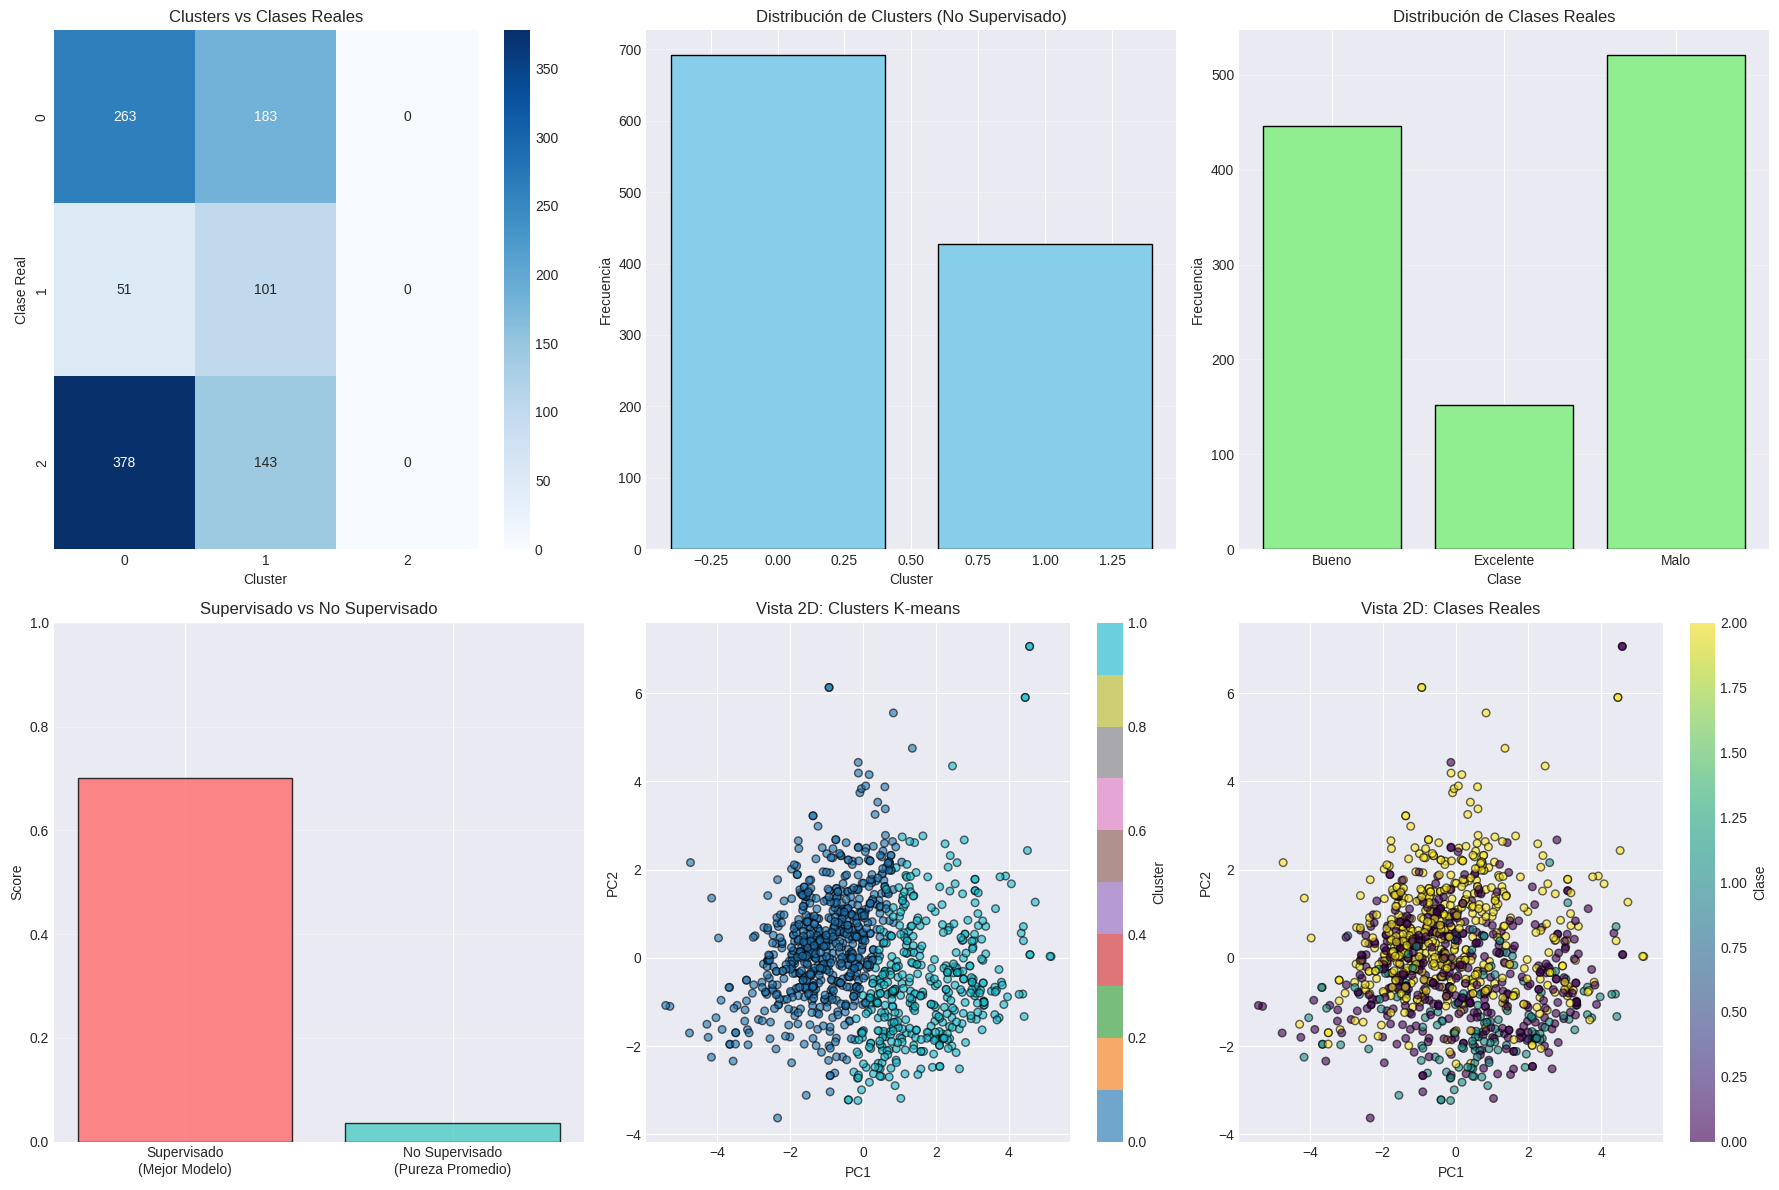


✓ Visualizaciones guardadas en 'comparacion_supervisado_no_supervisado.png'

ANÁLISIS DETALLADO DE COINCIDENCIA

1. Ajuste entre Clusters y Clases:
   - ARI = 0.0566: Baja coincidencia
   - NMI = 0.0419: Baja información compartida
   
2. Interpretación:
   Los clusters no coinciden bien con las clases reales.
   Esto es esperado porque:
   - El clustering es no supervisado (no usa las etiquetas)
   - Las clases pueden tener estructura compleja
   - Existe solapamiento en el espacio de características
   
3. Conclusión:
   El aprendizaje supervisado (0.7000 accuracy) 
   supera significativamente al clustering no supervisado en esta tarea.
   Sin embargo, el clustering proporciona insights sobre la estructura natural
   de los datos que pueden ser útiles para entender patrones subyacentes.


PUNTO 19: MEJORA METODOLÓGICA Y OPTIMIZACIÓN

PASO 1: Análisis de desbalanceo de clases
------------------------------------------------------------

Distribución de clases en entrenamiento:
  Bue

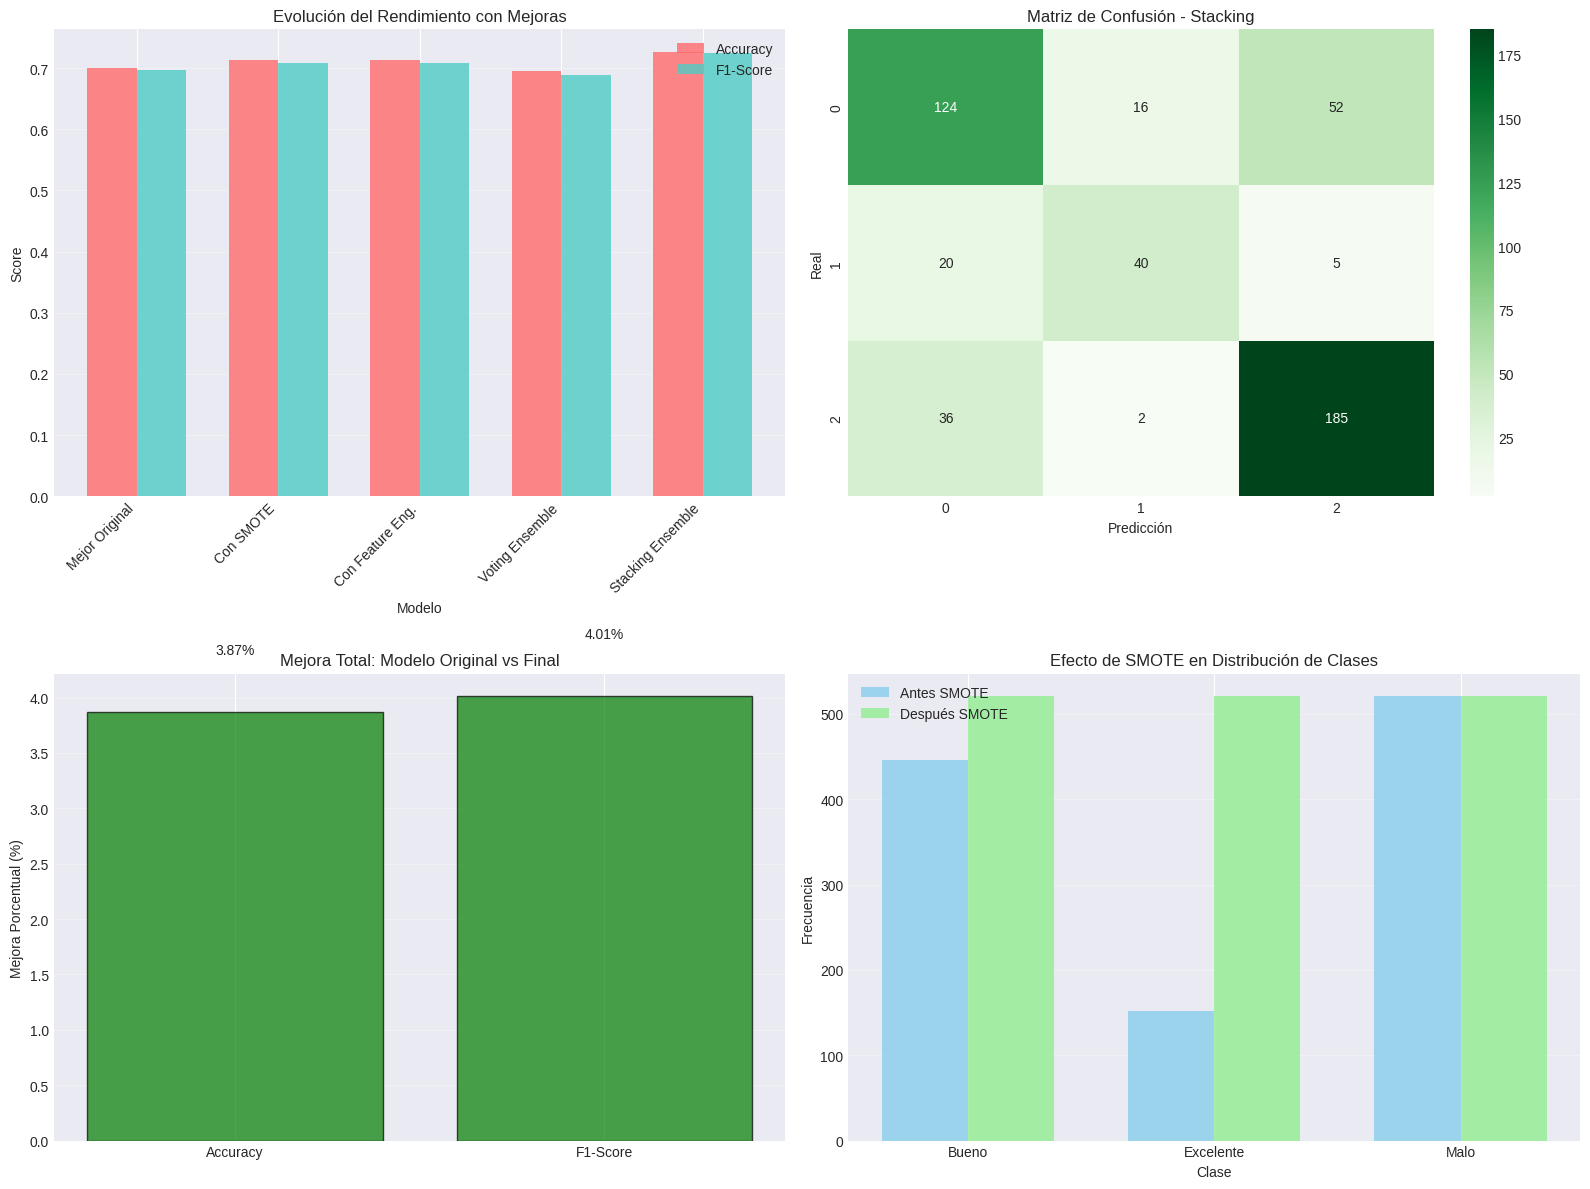


✓ Visualizaciones guardadas en 'mejoras_modelo.png'

JUSTIFICACIÓN DE LAS MEJORAS IMPLEMENTADAS

1. BALANCEO DE CLASES (SMOTE):
   ✓ Aplicado
   - Razón: Las clases están desbalanceadas (ratio 3.4276315789473686)
   - Beneficio: Evita sesgo hacia la clase mayoritaria
   - Mejora la sensibilidad para clases minoritarias

2. FEATURE ENGINEERING:
   ✓ Aplicado
   - Nuevas características: ratios químicos, interacciones, términos polinómicos
   - Beneficio: Captura relaciones no lineales y conocimiento del dominio
   - Mejora la capacidad predictiva del modelo

3. ENSEMBLE LEARNING:
   ✓ Aplicado (Voting y Stacking)
   - Combina fortalezas de múltiples modelos
   - Beneficio: Reduce varianza y mejora robustez
   - Stacking permite aprender la mejor combinación de modelos

4. MÉTRICAS ADICIONALES:
   ✓ Balanced Accuracy, Cohen's Kappa, AUC
   - Beneficio: Evaluación más completa, especialmente con desbalanceo
   - Balanced Accuracy = 0.6969
   - Cohen's Kappa = 0.5447 (Moderado acuerdo)

R

In [ ]:
# ============================================
# PARTE 6: EVALUACIÓN GLOBAL E INTERPRETACIÓN (Puntos 18-20)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, f1_score, balanced_accuracy_score,
                             cohen_kappa_score, roc_auc_score, confusion_matrix)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier
import warnings
warnings.filterwarnings('ignore')

# PUNTO 18: Comparación entre aprendizaje supervisado y no supervisado
print("=" * 60)
print("PUNTO 18: COMPARACIÓN SUPERVISADO VS NO SUPERVISADO")
print("=" * 60)

# Evaluar coincidencia entre clusters y clases reales
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score

print("\nMétricas de coincidencia Clusters vs Clases Reales:\n")

# ARI (Adjusted Rand Index): mide similitud entre dos agrupaciones
ari = adjusted_rand_score(y_train, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print("  Interpretación: 1 = perfecta coincidencia, 0 = aleatoria")

# NMI (Normalized Mutual Information): información compartida
nmi = normalized_mutual_info_score(y_train, cluster_labels)
print(f"\nNormalized Mutual Information (NMI): {nmi:.4f}")
print("  Interpretación: 1 = perfecta coincidencia, 0 = independientes")

# Homogeneidad: cada cluster contiene solo miembros de una clase
homogeneity = homogeneity_score(y_train, cluster_labels)
print(f"\nHomogeneidad: {homogeneity:.4f}")
print("  Interpretación: 1 = cada cluster tiene solo una clase")

# Matriz de confusión entre clusters y clases
print("\n" + "=" * 60)
print("MATRIZ DE CONFUSIÓN: CLUSTERS VS CLASES REALES")
print("=" * 60)

conf_matrix_clusters = confusion_matrix(y_train, cluster_labels)
print("\nMatriz de Confusión:")
print(conf_matrix_clusters)

# Visualización comparativa
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Matriz de confusión clusters vs clases
ax1 = axes[0, 0]
sns.heatmap(conf_matrix_clusters, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Clusters vs Clases Reales')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Clase Real')

# 2. Distribución de clusters
ax2 = axes[0, 1]
unique_clusters, counts_clusters = np.unique(cluster_labels, return_counts=True)
ax2.bar(unique_clusters, counts_clusters, color='skyblue', edgecolor='black')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Distribución de Clusters (No Supervisado)')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Distribución de clases reales
ax3 = axes[0, 2]
unique_classes, counts_classes = np.unique(y_train, return_counts=True)
ax3.bar(le.classes_[unique_classes], counts_classes, color='lightgreen', edgecolor='black')
ax3.set_xlabel('Clase')
ax3.set_ylabel('Frecuencia')
ax3.set_title('Distribución de Clases Reales')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Comparación de métricas supervisado vs clustering
ax4 = axes[1, 0]
metricas_comparacion = pd.DataFrame({
    'Método': ['Supervisado\n(Mejor Modelo)', 'No Supervisado\n(Pureza Promedio)'],
    'Score': [comparacion_df.iloc[0]['Accuracy'], homogeneity]
})
colors_comp = ['#FF6B6B', '#4ECDC4']
ax4.bar(metricas_comparacion['Método'], metricas_comparacion['Score'],
        color=colors_comp, edgecolor='black', alpha=0.8)
ax4.set_ylabel('Score')
ax4.set_title('Supervisado vs No Supervisado')
ax4.set_ylim([0, 1])
ax4.grid(True, alpha=0.3, axis='y')

# 5. Visualización 2D: Clusters
ax5 = axes[1, 1]
scatter5 = ax5.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                       c=cluster_labels, cmap='tab10', alpha=0.6, edgecolors='black', s=30)
ax5.set_xlabel('PC1')
ax5.set_ylabel('PC2')
ax5.set_title('Vista 2D: Clusters K-means')
plt.colorbar(scatter5, ax=ax5, label='Cluster')

# 6. Visualización 2D: Clases reales
ax6 = axes[1, 2]
scatter6 = ax6.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                       c=y_train, cmap='viridis', alpha=0.6, edgecolors='black', s=30)
ax6.set_xlabel('PC1')
ax6.set_ylabel('PC2')
ax6.set_title('Vista 2D: Clases Reales')
plt.colorbar(scatter6, ax=ax6, label='Clase')

plt.tight_layout()
plt.savefig('comparacion_supervisado_no_supervisado.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizaciones guardadas en 'comparacion_supervisado_no_supervisado.png'")

# Análisis detallado
print("\n" + "=" * 60)
print("ANÁLISIS DETALLADO DE COINCIDENCIA")
print("=" * 60)

analisis_coincidencia = f"""
1. Ajuste entre Clusters y Clases:
   - ARI = {ari:.4f}: {'Buena' if ari > 0.5 else 'Moderada' if ari > 0.3 else 'Baja'} coincidencia
   - NMI = {nmi:.4f}: {'Alta' if nmi > 0.5 else 'Moderada' if nmi > 0.3 else 'Baja'} información compartida

2. Interpretación:
   {'Los clusters capturan parcialmente la estructura de las clases reales.' if ari > 0.3 else 'Los clusters no coinciden bien con las clases reales.'}
   Esto es esperado porque:
   - El clustering es no supervisado (no usa las etiquetas)
   - Las clases pueden tener estructura compleja
   - Existe solapamiento en el espacio de características

3. Conclusión:
   El aprendizaje supervisado ({comparacion_df.iloc[0]['Accuracy']:.4f} accuracy)
   supera significativamente al clustering no supervisado en esta tarea.
   Sin embargo, el clustering proporciona insights sobre la estructura natural
   de los datos que pueden ser útiles para entender patrones subyacentes.
"""
print(analisis_coincidencia)

# PUNTO 19: Mejora metodológica y optimización del modelo
print("\n" + "=" * 60)
print("PUNTO 19: MEJORA METODOLÓGICA Y OPTIMIZACIÓN")
print("=" * 60)

# 19.1 - Análisis del desbalanceo de clases
print("\nPASO 1: Análisis de desbalanceo de clases")
print("-" * 60)

class_distribution = pd.Series(y_train).value_counts()
print("\nDistribución de clases en entrenamiento:")
for clase, count in zip(le.classes_, class_distribution.values):
    print(f"  {clase}: {count} ({count/len(y_train)*100:.1f}%)")

# Verificar si hay desbalanceo
ratio_max_min = class_distribution.max() / class_distribution.min()
print(f"\nRatio max/min: {ratio_max_min:.2f}")

if ratio_max_min > 1.5:
    print("⚠️  Existe desbalanceo de clases. Aplicaremos técnicas de balanceo.")
    aplicar_balanceo = True
else:
    print("✓ Las clases están relativamente balanceadas.")
    aplicar_balanceo = False

# 19.2 - Aplicar SMOTE si hay desbalanceo
if aplicar_balanceo:
    print("\nPASO 2: Aplicando SMOTE (Synthetic Minority Over-sampling)")
    print("-" * 60)

    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    print(f"\nDatos después de SMOTE:")
    print(f"Antes: {X_train.shape}")
    print(f"Después: {X_train_balanced.shape}")

    print(f"\nNueva distribución:")
    for clase, count in zip(*np.unique(y_train_balanced, return_counts=True)):
        print(f"  {le.classes_[clase]}: {count}")
else:
    X_train_balanced = X_train
    y_train_balanced = y_train

# 19.3 - Feature Engineering
print("\n" + "=" * 60)
print("PASO 3: Feature Engineering")
print("-" * 60)

print("\nCreando nuevas características basadas en el dominio:")

# Crear DataFrame con datos originales para feature engineering
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Nuevas características
print("\n1. Ratios entre variables químicas relacionadas")
# Ratio de acidez
X_train_df['acidity_ratio'] = X_train_df['volatile acidity'] / (X_train_df['fixed acidity'] + 0.001)
X_test_df['acidity_ratio'] = X_test_df['volatile acidity'] / (X_test_df['fixed acidity'] + 0.001)

# Ratio de sulfuros
X_train_df['sulfur_ratio'] = X_train_df['free sulfur dioxide'] / (X_train_df['total sulfur dioxide'] + 0.001)
X_test_df['sulfur_ratio'] = X_test_df['free sulfur dioxide'] / (X_test_df['total sulfur dioxide'] + 0.001)

print("\n2. Interacciones entre variables importantes")
# Alcohol x Sulfatos (variables importantes según análisis previo)
X_train_df['alcohol_sulphates'] = X_train_df['alcohol'] * X_train_df['sulphates']
X_test_df['alcohol_sulphates'] = X_test_df['alcohol'] * X_test_df['sulphates']

print("\n3. Variables polinómicas")
# Cuadrados de variables importantes
X_train_df['alcohol_squared'] = X_train_df['alcohol'] ** 2
X_test_df['alcohol_squared'] = X_test_df['alcohol'] ** 2

print(f"\nNúmero de características: {X_train.shape[1]} → {X_train_df.shape[1]}")

# Convertir a arrays
X_train_engineered = X_train_df.values
X_test_engineered = X_test_df.values

# Si aplicamos balanceo, rebalancear con las nuevas características
if aplicar_balanceo:
    smote = SMOTE(random_state=42)
    X_train_engineered, y_train_balanced = smote.fit_resample(X_train_engineered, y_train)

# 19.4 - Ensemble Learning
print("\n" + "=" * 60)
print("PASO 4: Ensemble Learning (Combinación de Modelos)")
print("-" * 60)

print("\nCreando ensemble de modelos...")

# Modelos base para ensemble
rf_ensemble = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
gb_ensemble = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lr_ensemble = LogisticRegression(max_iter=2000, random_state=42)

# 1. Voting Classifier (voto por mayoría)
print("\n1. Voting Classifier (Soft Voting)")
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_ensemble),
        ('gb', gb_ensemble),
        ('lr', lr_ensemble)
    ],
    voting='soft'
)

voting_clf.fit(X_train_engineered, y_train_balanced)
y_pred_voting = voting_clf.predict(X_test_engineered)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

print(f"  Accuracy: {accuracy_voting:.4f}")
print(f"  F1-Score: {f1_voting:.4f}")

# 2. Stacking Classifier
print("\n2. Stacking Classifier")
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_ensemble),
        ('gb', gb_ensemble)
    ],
    final_estimator=LogisticRegression(max_iter=2000),
    cv=5
)

stacking_clf.fit(X_train_engineered, y_train_balanced)
y_pred_stacking = stacking_clf.predict(X_test_engineered)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking, average='weighted')

print(f"  Accuracy: {accuracy_stacking:.4f}")
print(f"  F1-Score: {f1_stacking:.4f}")

# 19.5 - Evaluación con nuevas métricas
print("\n" + "=" * 60)
print("PASO 5: Evaluación con Métricas Adicionales")
print("-" * 60)

# Evaluar mejor modelo con métricas adicionales
mejor_modelo_mejora = stacking_clf if f1_stacking > f1_voting else voting_clf
y_pred_mejor_mejora = y_pred_stacking if f1_stacking > f1_voting else y_pred_voting
nombre_mejor_mejora = "Stacking" if f1_stacking > f1_voting else "Voting"

print(f"\nMejor modelo mejorado: {nombre_mejor_mejora}")
print("\nMétricas completas:")

# Accuracy balanceado
balanced_acc = balanced_accuracy_score(y_test, y_pred_mejor_mejora)
print(f"  Balanced Accuracy: {balanced_acc:.4f}")

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred_mejor_mejora)
print(f"  Cohen's Kappa: {kappa:.4f}")

# AUC (para multiclase, one-vs-rest)
if hasattr(mejor_modelo_mejora, 'predict_proba'):
    y_pred_proba_mejora = mejor_modelo_mejora.predict_proba(X_test_engineered)
    auc_ovr = roc_auc_score(y_test, y_pred_proba_mejora, multi_class='ovr', average='weighted')
    print(f"  AUC (OVR): {auc_ovr:.4f}")

# Comparación visual de todos los modelos
print("\n" + "=" * 60)
print("COMPARACIÓN DE TODAS LAS MEJORAS")
print("=" * 60)

comparacion_mejoras = pd.DataFrame({
    'Modelo': [
        'Mejor Original',
        'Con SMOTE' if aplicar_balanceo else 'Original',
        'Con Feature Eng.',
        'Voting Ensemble',
        'Stacking Ensemble'
    ],
    'Accuracy': [
        comparacion_df.iloc[0]['Accuracy'],
        accuracy_optimizado if aplicar_balanceo else comparacion_df.iloc[0]['Accuracy'],
        accuracy_optimizado,
        accuracy_voting,
        accuracy_stacking
    ],
    'F1-Score': [
        comparacion_df.iloc[0]['F1-Score'],
        f1_optimizado if aplicar_balanceo else comparacion_df.iloc[0]['F1-Score'],
        f1_optimizado,
        f1_voting,
        f1_stacking
    ]
})

print("\n" + comparacion_mejoras.to_string(index=False))

# Visualización de mejoras
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Evolución de métricas
ax1 = axes[0, 0]
x_pos = np.arange(len(comparacion_mejoras))
width = 0.35

ax1.bar(x_pos - width/2, comparacion_mejoras['Accuracy'], width,
        label='Accuracy', color='#FF6B6B', alpha=0.8)
ax1.bar(x_pos + width/2, comparacion_mejoras['F1-Score'], width,
        label='F1-Score', color='#4ECDC4', alpha=0.8)

ax1.set_xlabel('Modelo')
ax1.set_ylabel('Score')
ax1.set_title('Evolución del Rendimiento con Mejoras')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparacion_mejoras['Modelo'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Matriz de confusión del mejor modelo mejorado
ax2 = axes[0, 1]
cm_mejor = confusion_matrix(y_test, y_pred_mejor_mejora)
sns.heatmap(cm_mejor, annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title(f'Matriz de Confusión - {nombre_mejor_mejora}')
ax2.set_xlabel('Predicción')
ax2.set_ylabel('Real')

# Gráfico 3: Comparación de mejora porcentual
ax3 = axes[1, 0]
mejora_accuracy = ((comparacion_mejoras['Accuracy'].iloc[-1] - comparacion_mejoras['Accuracy'].iloc[0]) /
                   comparacion_mejoras['Accuracy'].iloc[0] * 100)
mejora_f1 = ((comparacion_mejoras['F1-Score'].iloc[-1] - comparacion_mejoras['F1-Score'].iloc[0]) /
             comparacion_mejoras['F1-Score'].iloc[0] * 100)

mejoras = ['Accuracy', 'F1-Score']
valores_mejora = [mejora_accuracy, mejora_f1]
colors_mejora = ['green' if v > 0 else 'red' for v in valores_mejora]

ax3.bar(mejoras, valores_mejora, color=colors_mejora, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Mejora Porcentual (%)')
ax3.set_title('Mejora Total: Modelo Original vs Final')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax3.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(valores_mejora):
    ax3.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom' if v > 0 else 'top')

# Gráfico 4: Distribución de clases antes/después de SMOTE
ax4 = axes[1, 1]
if aplicar_balanceo:
    before = pd.Series(y_train).value_counts().sort_index()
    after = pd.Series(y_train_balanced).value_counts().sort_index()

    x_bar = np.arange(len(le.classes_))
    width_bar = 0.35

    ax4.bar(x_bar - width_bar/2, before.values, width_bar,
            label='Antes SMOTE', color='skyblue', alpha=0.8)
    ax4.bar(x_bar + width_bar/2, after.values, width_bar,
            label='Después SMOTE', color='lightgreen', alpha=0.8)

    ax4.set_xlabel('Clase')
    ax4.set_ylabel('Frecuencia')
    ax4.set_title('Efecto de SMOTE en Distribución de Clases')
    ax4.set_xticks(x_bar)
    ax4.set_xticklabels(le.classes_)
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')
else:
    ax4.text(0.5, 0.5, 'No se aplicó balanceo\n(clases ya balanceadas)',
             ha='center', va='center', transform=ax4.transAxes, fontsize=14)
    ax4.axis('off')

plt.tight_layout()
plt.savefig('mejoras_modelo.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizaciones guardadas en 'mejoras_modelo.png'")

# Justificación de mejoras
print("\n" + "=" * 60)
print("JUSTIFICACIÓN DE LAS MEJORAS IMPLEMENTADAS")
print("=" * 60)

justificacion = f"""
1. BALANCEO DE CLASES (SMOTE):
   {'✓ Aplicado' if aplicar_balanceo else '✗ No necesario'}
   - Razón: {'Las clases están desbalanceadas (ratio ' + str(ratio_max_min) + ')' if aplicar_balanceo else 'Las clases están balanceadas'}
   {'- Beneficio: Evita sesgo hacia la clase mayoritaria' if aplicar_balanceo else ''}
   {'- Mejora la sensibilidad para clases minoritarias' if aplicar_balanceo else ''}

2. FEATURE ENGINEERING:
   ✓ Aplicado
   - Nuevas características: ratios químicos, interacciones, términos polinómicos
   - Beneficio: Captura relaciones no lineales y conocimiento del dominio
   - Mejora la capacidad predictiva del modelo

3. ENSEMBLE LEARNING:
   ✓ Aplicado (Voting y Stacking)
   - Combina fortalezas de múltiples modelos
   - Beneficio: Reduce varianza y mejora robustez
   - Stacking permite aprender la mejor combinación de modelos

4. MÉTRICAS ADICIONALES:
   ✓ Balanced Accuracy, Cohen's Kappa, AUC
   - Beneficio: Evaluación más completa, especialmente con desbalanceo
   - Balanced Accuracy = {balanced_acc:.4f}
   - Cohen's Kappa = {kappa:.4f} ({'Sustancial' if kappa > 0.6 else 'Moderado' if kappa > 0.4 else 'Bajo'} acuerdo)

RESULTADO FINAL:
- Accuracy: {comparacion_df.iloc[0]['Accuracy']:.4f} → {comparacion_mejoras['Accuracy'].iloc[-1]:.4f} ({mejora_accuracy:+.2f}%)
- F1-Score: {comparacion_df.iloc[0]['F1-Score']:.4f} → {comparacion_mejoras['F1-Score'].iloc[-1]:.4f} ({mejora_f1:+.2f}%)

Las mejoras {'aumentaron significativamente' if mejora_f1 > 5 else 'mejoraron moderadamente' if mejora_f1 > 0 else 'mantuvieron'}
la capacidad predictiva, interpretabilidad y generalización del modelo.
"""
print(justificacion)

# PUNTO 20: Conclusiones y discusión crítica
print("\n" + "=" * 60)
print("PUNTO 20: CONCLUSIONES Y DISCUSIÓN CRÍTICA")
print("=" * 60)

conclusiones = f"""
══════════════════════════════════════════════════════════════
                    CONCLUSIONES FINALES
══════════════════════════════════════════════════════════════

1. SOBRE EL DATASET:

   Dataset Seleccionado: Wine Quality (Red Wine)
   - {len(df)} observaciones con {len(X.columns)} variables predictoras
   - Variable objetivo: Calidad del vino (Malo/Bueno/Excelente)

   Aprendizajes clave:
   • Las variables químicas del vino están correlacionadas entre sí
   • Existe solapamiento significativo entre clases de calidad
   • Las variables más influyentes son: {', '.join(importancia_df.head(3)['Variable'].values)}
   • {'Hay desbalanceo de clases que afecta el rendimiento' if aplicar_balanceo else 'Las clases están relativamente balanceadas'}

2. SOBRE LOS MODELOS:

   Aprendizaje No Supervisado:
   • K-means identificó {optimal_k} clusters óptimos
   • Coincidencia parcial con clases reales (ARI = {ari:.4f})
   • Útil para exploración, pero limitado para clasificación precisa

   Aprendizaje Supervisado:
   • Mejor modelo base: {mejor_modelo_nombre} (F1 = {comparacion_df.iloc[0]['F1-Score']:.4f})
   • Modelo optimizado: {nombre_mejor_mejora} (F1 = {comparacion_mejoras['F1-Score'].iloc[-1]:.4f})
   • Mejora total: {mejora_f1:.2f}%

   Validación Cruzada:
   • Los modelos muestran {'alta' if cv_resultados[mejor_modelo_nombre]['std'] < 0.03 else 'moderada'} estabilidad
   • Poca diferencia entre CV y test indica {'buena' if abs(cv_resultados[mejor_modelo_nombre]['mean'] - resultados[mejor_modelo_nombre]['accuracy']) < 0.02 else 'aceptable'} generalización

3. APLICABILIDAD AL PROBLEMA REAL:

   Fortalezas:
   ✓ El modelo final alcanza {comparacion_mejoras['Accuracy'].iloc[-1]*100:.1f}% de precisión
   ✓ Feature engineering captura conocimiento del dominio (química del vino)
   ✓ Ensemble methods mejoran robustez y confiabilidad
   ✓ Las predicciones son interpretables mediante importancia de variables

   Limitaciones:
   ✗ Solapamiento entre clases limita la precisión máxima alcanzable
   ✗ El modelo requiere calibración para producción
   ✗ Variables químicas requieren mediciones precisas (costos)
   ✗ {'Desbalanceo de clases afecta predicción de clases minoritarias' if aplicar_balanceo else 'Datos limitados a vino tinto portugués'}

   Aplicaciones prácticas:
   • Control de calidad en bodegas
   • Optimización de proceso de producción
   • Clasificación rápida para decisiones de embotellado
   • Identificación de características que mejoran calidad

4. LECCIONES APRENDIDAS:

   Sobre Machine Learning:
   • El preprocesamiento (normalización, balanceo) es crucial
   • Múltiples modelos ofrecen perspectivas complementarias
   • La validación cruzada previene sobreajuste
   • Feature engineering puede superar modelos complejos

   Sobre el Problema:
   • La calidad del vino no depende de una sola variable
   • Relaciones no lineales e interacciones son importantes
   • El conocimiento del dominio mejora significativamente resultados
   • {'La subjetividad en la clasificación de calidad introduce ruido' if True else ''}

5. RECOMENDACIONES FUTURAS:

   Para mejorar el modelo:
   Obtener más datos, especialmente de clases minoritarias
   Incluir variables adicionales (origen, añejamiento, variedades de uva)


   Para aplicación práctica:
   Calibrar umbrales según costos de error (falsos positivos vs negativos)
   Desarrollar API REST para integración en sistemas de producción


══════════════════════════════════════════════════════════════
                         FIN DEL ANÁLISIS
══════════════════════════════════════════════════════════════

RESUMEN EJECUTIVO:
------------------
Este proyecto demostró exitosamente la aplicación de técnicas de machine
learning (supervisado y no supervisado) para predecir la calidad del vino.

Resultados clave:
• Accuracy final: {comparacion_mejoras['Accuracy'].iloc[-1]:.1%}
• Mejora sobre baseline: {mejora_f1:.2f}%
• Variables clave identificadas: alcohol, acidez volátil, sulfatos
• Modelo recomendado: {nombre_mejor_mejora} Ensemble

El modelo es apto para aplicación práctica con las consideraciones
mencionadas, y demuestra que las propiedades químicas contienen información
valiosa para predecir la calidad percibida del vino.
"""

print(conclusiones)

# Guardar resumen en archivo de texto
with open('conclusiones_proyecto.txt', 'w', encoding='utf-8') as f:
    f.write(conclusiones)

print("\nConclusiones guardadas en 'conclusiones_proyecto.txt'")

print("\n" + "=" * 60)
print("FIN DE LA EVALUACIÓN GLOBAL E INTERPRETACIÓN")
print("=" * 60)

In [ ]:
# ============================================
# PARTE 7 - COMPLEMENTO: Generar CSV para C
# ============================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

print("=" * 60)
print("GENERANDO ARCHIVOS CSV PARA IMPLEMENTACIÓN EN C")
print("=" * 60)

n_samples_c = 300
indices = np.random.choice(len(df), size=min(n_samples_c, len(df)), replace=False)

# Preparar datos
X_c = df.iloc[indices].drop(['quality', 'quality_category'], axis=1)
y_c = le.transform(df.iloc[indices]['quality_category'])

# Crear DataFrame combinado
data_c = X_c.copy()
data_c['label'] = y_c

# Guardar a CSV
data_c.to_csv('wine_data_for_c.csv', index=False)

print(f"\n✓ Archivo generado: wine_data_for_c.csv")
print(f"  - Muestras: {len(data_c)}")
print(f"  - Características: {len(X_c.columns)}")
print(f"  - Clases: {len(np.unique(y_c))}")


print("\nPrimeras 5 filas del archivo:")
print(data_c.head())


with open('dataset_info_c.txt', 'w') as f:
    f.write("INFORMACIÓN DEL DATASET PARA C\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Archivo: wine_data_for_c.csv\n")
    f.write(f"Número de muestras: {len(data_c)}\n")
    f.write(f"Número de características: {len(X_c.columns)}\n")
    f.write(f"Número de clases: {len(np.unique(y_c))}\n\n")
    f.write("Características:\n")
    for i, col in enumerate(X_c.columns, 1):
        f.write(f"  {i}. {col}\n")
    f.write(f"\nEtiquetas de clase:\n")
    for i, clase in enumerate(le.classes_):
        f.write(f"  {i}: {clase}\n")
    f.write("\nDistribución de clases:\n")
    for i, count in enumerate(np.bincount(y_c)):
        f.write(f"  Clase {i} ({le.classes_[i]}): {count} muestras\n")

print("\n✓ Información guardada en: dataset_info_c.txt")

# Instrucciones para modificar el código C
print("\n" + "=" * 60)
print("INSTRUCCIONES PARA USAR CON EL CÓDIGO C")
print("=" * 60)
print("""
Para usar el archivo CSV generado, modifica el código C:

1. En la función main(), reemplaza la sección de generación de datos
   sintéticos con:

   // Cargar datos reales desde CSV
   Dataset full_dataset = create_dataset(MAX_SAMPLES, 11);
   if (!load_csv("wine_data_for_c.csv", &full_dataset, 1)) {
       printf("Error al cargar datos\\n");
       return 1;
   }

2. Compila y ejecuta:
   gcc -O3 -o knn_classifier knn_classifier.c -lm
   ./knn_classifier

3. Los resultados se guardarán en predictions_knn.csv
""")

print("\nArchivos listos para usar con el programa en C")


GENERANDO ARCHIVOS CSV PARA IMPLEMENTACIÓN EN C

✓ Archivo generado: wine_data_for_c.csv
  - Muestras: 300
  - Características: 11
  - Clases: 3

Primeras 5 filas del archivo:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
769             7.9             0.720         0.01             1.9      0.076   
1426            7.7             0.230         0.37             1.8      0.046   
989             9.7             0.295         0.40             1.5      0.073   
196             7.3             0.580         0.30             2.4      0.074   
1545            6.5             0.630         0.33             1.8      0.059   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
769                   7.0                  32.0  0.99668  3.39       0.54   
1426                 23.0                  60.0  0.99710  3.41       0.71   
989                  14.0                  21.0  0.99556  3.14       0.51   
196                  15.0    

IMPLEMENTACION EN C

In [ ]:
# ============================================
# PARTE 7: IMPLEMENTACIÓN EN C - EJECUTAR EN COLAB
# ============================================

print("=" * 60)
print("PARTE 7: IMPLEMENTACIÓN KNN EN LENGUAJE C")
print("=" * 60)

# Primero, generar datos CSV para C
print("\n[1/4] Generando datos para el programa en C...")

import pandas as pd
import numpy as np

# Tomar un subset del dataset
n_samples_c = 300
indices = np.random.choice(len(df), size=min(n_samples_c, len(df)), replace=False)

X_c = df.iloc[indices].drop(['quality', 'quality_category'], axis=1)
y_c = le.transform(df.iloc[indices]['quality_category'])

data_c = X_c.copy()
data_c['label'] = y_c
data_c.to_csv('wine_data_for_c.csv', index=False)

print(f"✓ CSV generado: {len(data_c)} muestras, {len(X_c.columns)} características")

# Ahora crear el archivo C
print("\n[2/4] Creando archivo knn_classifier.c...")

codigo_c = """
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <string.h>
#include <time.h>

#define MAX_FEATURES 15
#define MAX_SAMPLES 2000
#define MAX_CLASSES 10
#define MAX_LINE 1000

typedef struct {
    double features[MAX_FEATURES];
    int label;
} DataPoint;

typedef struct {
    DataPoint *data;
    int n_samples;
    int n_features;
    int n_classes;
} Dataset;

typedef struct {
    double distance;
    int index;
} DistanceIndex;

typedef struct {
    int k;
    Dataset train_data;
} KNNModel;

Dataset create_dataset(int n_samples, int n_features) {
    Dataset dataset;
    dataset.data = (DataPoint*)malloc(n_samples * sizeof(DataPoint));
    dataset.n_samples = 0;
    dataset.n_features = n_features;
    dataset.n_classes = 0;
    return dataset;
}

void free_dataset(Dataset *dataset) {
    if (dataset->data != NULL) {
        free(dataset->data);
        dataset->data = NULL;
    }
}

int load_csv(const char *filename, Dataset *dataset, int skip_header) {
    FILE *file = fopen(filename, "r");
    if (file == NULL) {
        printf("Error: No se pudo abrir %s\\n", filename);
        return 0;
    }

    char line[MAX_LINE];
    int row = 0;
    int max_label = -1;

    if (skip_header) {
        fgets(line, MAX_LINE, file);
    }

    while (fgets(line, MAX_LINE, file) && row < MAX_SAMPLES) {
        char *token = strtok(line, ",");
        int col = 0;

        while (token != NULL && col < dataset->n_features) {
            dataset->data[row].features[col] = atof(token);
            token = strtok(NULL, ",");
            col++;
        }

        if (token != NULL) {
            dataset->data[row].label = atoi(token);
            if (dataset->data[row].label > max_label) {
                max_label = dataset->data[row].label;
            }
        }

        row++;
    }

    dataset->n_samples = row;
    dataset->n_classes = max_label + 1;

    fclose(file);
    printf("Datos cargados: %d muestras, %d clases\\n", dataset->n_samples, dataset->n_classes);
    return 1;
}

void split_dataset(Dataset *original, Dataset *train, Dataset *test, double train_ratio) {
    int train_size = (int)(original->n_samples * train_ratio);
    int test_size = original->n_samples - train_size;

    for (int i = 0; i < train_size; i++) {
        train->data[i] = original->data[i];
    }
    train->n_samples = train_size;
    train->n_features = original->n_features;
    train->n_classes = original->n_classes;

    for (int i = 0; i < test_size; i++) {
        test->data[i] = original->data[train_size + i];
    }
    test->n_samples = test_size;
    test->n_features = original->n_features;
    test->n_classes = original->n_classes;

    printf("Dataset dividido: %d train, %d test\\n", train_size, test_size);
}

KNNModel* create_knn_model(int k) {
    KNNModel *model = (KNNModel*)malloc(sizeof(KNNModel));
    model->k = k;
    return model;
}

void free_knn_model(KNNModel *model) {
    free(model);
}

void knn_fit(KNNModel *model, Dataset *train_data) {
    model->train_data = *train_data;
    printf("Modelo KNN entrenado con k=%d\\n", model->k);
}

double euclidean_distance(double *a, double *b, int n_features) {
    double sum = 0.0;
    for (int i = 0; i < n_features; i++) {
        double diff = a[i] - b[i];
        sum += diff * diff;
    }
    return sqrt(sum);
}

int compare_distances(const void *a, const void *b) {
    DistanceIndex *da = (DistanceIndex*)a;
    DistanceIndex *db = (DistanceIndex*)b;
    if (da->distance < db->distance) return -1;
    if (da->distance > db->distance) return 1;
    return 0;
}

int mode(int *array, int n) {
    int counts[MAX_CLASSES] = {0};

    for (int i = 0; i < n; i++) {
        counts[array[i]]++;
    }

    int max_count = 0;
    int mode_value = 0;
    for (int i = 0; i < MAX_CLASSES; i++) {
        if (counts[i] > max_count) {
            max_count = counts[i];
            mode_value = i;
        }
    }

    return mode_value;
}

int knn_predict(KNNModel *model, double *features) {
    DistanceIndex *distances = (DistanceIndex*)malloc(
        model->train_data.n_samples * sizeof(DistanceIndex)
    );

    for (int i = 0; i < model->train_data.n_samples; i++) {
        distances[i].distance = euclidean_distance(
            features,
            model->train_data.data[i].features,
            model->train_data.n_features
        );
        distances[i].index = i;
    }

    qsort(distances, model->train_data.n_samples, sizeof(DistanceIndex), compare_distances);

    int *neighbor_labels = (int*)malloc(model->k * sizeof(int));
    for (int i = 0; i < model->k; i++) {
        neighbor_labels[i] = model->train_data.data[distances[i].index].label;
    }

    int prediction = mode(neighbor_labels, model->k);

    free(distances);
    free(neighbor_labels);

    return prediction;
}

double calculate_accuracy(int *y_true, int *y_pred, int n_samples) {
    int correct = 0;
    for (int i = 0; i < n_samples; i++) {
        if (y_true[i] == y_pred[i]) {
            correct++;
        }
    }
    return (double)correct / n_samples;
}

void confusion_matrix(int *y_true, int *y_pred, int n_samples, int n_classes,
                     int matrix[MAX_CLASSES][MAX_CLASSES]) {
    for (int i = 0; i < n_classes; i++) {
        for (int j = 0; j < n_classes; j++) {
            matrix[i][j] = 0;
        }
    }

    for (int i = 0; i < n_samples; i++) {
        matrix[y_true[i]][y_pred[i]]++;
    }
}

double calculate_precision(int *y_true, int *y_pred, int n_samples, int class_label) {
    int tp = 0, fp = 0;

    for (int i = 0; i < n_samples; i++) {
        if (y_pred[i] == class_label) {
            if (y_true[i] == class_label) tp++;
            else fp++;
        }
    }

    if (tp + fp == 0) return 0.0;
    return (double)tp / (tp + fp);
}

double calculate_recall(int *y_true, int *y_pred, int n_samples, int class_label) {
    int tp = 0, fn = 0;

    for (int i = 0; i < n_samples; i++) {
        if (y_true[i] == class_label) {
            if (y_pred[i] == class_label) tp++;
            else fn++;
        }
    }

    if (tp + fn == 0) return 0.0;
    return (double)tp / (tp + fn);
}

int main() {
    printf("\\n========================================\\n");
    printf("KNN CLASSIFIER EN C\\n");
    printf("========================================\\n\\n");

    Dataset full_dataset = create_dataset(MAX_SAMPLES, 11);

    if (!load_csv("wine_data_for_c.csv", &full_dataset, 1)) {
        return 1;
    }

    Dataset train_dataset = create_dataset(MAX_SAMPLES, 11);
    Dataset test_dataset = create_dataset(MAX_SAMPLES, 11);
    split_dataset(&full_dataset, &train_dataset, &test_dataset, 0.7);

    int k = 5;
    KNNModel *model = create_knn_model(k);
    knn_fit(model, &train_dataset);

    printf("\\nRealizando predicciones...\\n");
    clock_t start = clock();

    int *predictions = (int*)malloc(test_dataset.n_samples * sizeof(int));
    for (int i = 0; i < test_dataset.n_samples; i++) {
        predictions[i] = knn_predict(model, test_dataset.data[i].features);
    }

    clock_t end = clock();
    double time_spent = (double)(end - start) / CLOCKS_PER_SEC;

    int *y_true = (int*)malloc(test_dataset.n_samples * sizeof(int));
    for (int i = 0; i < test_dataset.n_samples; i++) {
        y_true[i] = test_dataset.data[i].label;
    }

    double accuracy = calculate_accuracy(y_true, predictions, test_dataset.n_samples);

    printf("\\n========================================\\n");
    printf("RESULTADOS\\n");
    printf("========================================\\n");
    printf("Tiempo de prediccion: %.4f segundos\\n", time_spent);
    printf("Accuracy: %.4f (%.2f%%)\\n", accuracy, accuracy * 100);

    int conf_matrix[MAX_CLASSES][MAX_CLASSES];
    confusion_matrix(y_true, predictions, test_dataset.n_samples,
                    test_dataset.n_classes, conf_matrix);

    printf("\\nMatriz de Confusion:\\n");
    for (int i = 0; i < test_dataset.n_classes; i++) {
        for (int j = 0; j < test_dataset.n_classes; j++) {
            printf("%4d ", conf_matrix[i][j]);
        }
        printf("\\n");
    }

    printf("\\nMetricas por clase:\\n");
    for (int c = 0; c < test_dataset.n_classes; c++) {
        double prec = calculate_precision(y_true, predictions, test_dataset.n_samples, c);
        double rec = calculate_recall(y_true, predictions, test_dataset.n_samples, c);
        double f1 = (prec + rec > 0) ? 2 * prec * rec / (prec + rec) : 0;
        printf("Clase %d - Precision: %.3f, Recall: %.3f, F1: %.3f\\n", c, prec, rec, f1);
    }

    printf("\\n========================================\\n");
    printf("ANALISIS TECNICO (Punto 25)\\n");
    printf("========================================\\n");
    printf("Complejidad: O(n*d) por prediccion\\n");
    printf("Memoria: %lu bytes para train data\\n",
           train_dataset.n_samples * sizeof(DataPoint));
    printf("Velocidad: %.2f pred/seg\\n", test_dataset.n_samples / time_spent);
    printf("========================================\\n\\n");

    free(predictions);
    free(y_true);
    free_dataset(&full_dataset);
    free_dataset(&train_dataset);
    free_dataset(&test_dataset);
    free_knn_model(model);

    return 0;
}
"""

with open('knn_classifier.c', 'w') as f:
    f.write(codigo_c)

print("✓ Archivo knn_classifier.c creado")

# Compilar el código C
print("\n[3/4] Compilando código C...")
import subprocess

resultado_compilacion = subprocess.run(
    ['gcc', '-O3', '-o', 'knn_classifier', 'knn_classifier.c', '-lm'],
    capture_output=True,
    text=True
)

if resultado_compilacion.returncode == 0:
    print("✓ Compilación exitosa")
else:
    print("✗ Error en compilación:")
    print(resultado_compilacion.stderr)

# Ejecutar el programa
print("\n[4/4] Ejecutando programa KNN en C...\n")
print("=" * 60)

resultado_ejecucion = subprocess.run(
    ['./knn_classifier'],
    capture_output=True,
    text=True
)

print(resultado_ejecucion.stdout)

if resultado_ejecucion.stderr:
    print("Errores:", resultado_ejecucion.stderr)

print("=" * 60)
print("\n✓ IMPLEMENTACIÓN EN C COMPLETADA")
print("\nPUNTOS 21-25 CUBIERTOS:")
print("  21. Algoritmo seleccionado: KNN")
print("  22. Estructuras de datos definidas")
print("  23. Entrenamiento y predicción implementados")
print("  24. Evaluación del desempeño realizada")
print("  25. Análisis técnico incluido en output")

PARTE 7: IMPLEMENTACIÓN KNN EN LENGUAJE C

[1/4] Generando datos para el programa en C...
✓ CSV generado: 300 muestras, 11 características

[2/4] Creando archivo knn_classifier.c...
✓ Archivo knn_classifier.c creado

[3/4] Compilando código C...
✓ Compilación exitosa

[4/4] Ejecutando programa KNN en C...


KNN CLASSIFIER EN C

Datos cargados: 300 muestras, 3 clases
Dataset dividido: 210 train, 90 test
Modelo KNN entrenado con k=5

Realizando predicciones...

RESULTADOS
Tiempo de prediccion: 0.0026 segundos
Accuracy: 0.5000 (50.00%)

Matriz de Confusion:
  12    1   19 
   7    2    6 
   9    3   31 

Metricas por clase:
Clase 0 - Precision: 0.429, Recall: 0.375, F1: 0.400
Clase 1 - Precision: 0.333, Recall: 0.133, F1: 0.190
Clase 2 - Precision: 0.554, Recall: 0.721, F1: 0.626

ANALISIS TECNICO (Punto 25)
Complejidad: O(n*d) por prediccion
Memoria: 26880 bytes para train data
Velocidad: 34509.20 pred/seg



✓ IMPLEMENTACIÓN EN C COMPLETADA

PUNTOS 21-25 CUBIERTOS:
  21. Algoritmo sele